In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Levine.csv')

In [3]:
df_cleaned = df.drop(columns=['Time','file_number', 'event_number'])


len(df_cleaned.columns)
df_cleaned.columns

Index(['Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22',
       'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab',
       'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7',
       'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
       'HLA-DR', 'CD64', 'CD41', 'Viability', 'label', 'individual'],
      dtype='object')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


null_counts = df_cleaned.isnull().sum()
non_null_counts = df_cleaned.notnull().sum()

print("Null values in the label column are:",null_counts['label'])
print("Non-Null values in the label column are:",non_null_counts['label'])


Null values in the label column are: 161443
Non-Null values in the label column are: 104184


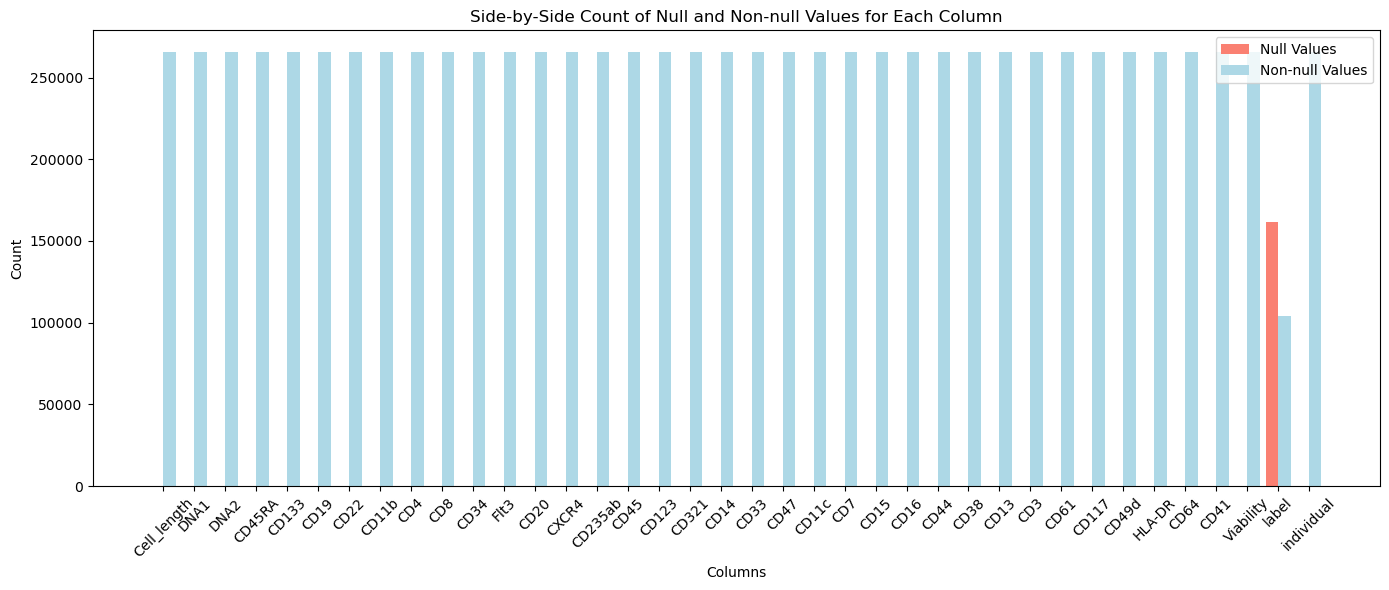

In [5]:
import numpy as np
columns=df_cleaned.columns
indices = np.arange(len(columns))

bar_width = 0.4

plt.figure(figsize=(14, 6))

plt.bar(indices - bar_width/2, null_counts, width=bar_width, label='Null Values', color='salmon')
plt.bar(indices + bar_width/2, non_null_counts, width=bar_width, label='Non-null Values', color='lightblue')


plt.title('Side-by-Side Count of Null and Non-null Values for Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(indices, columns, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

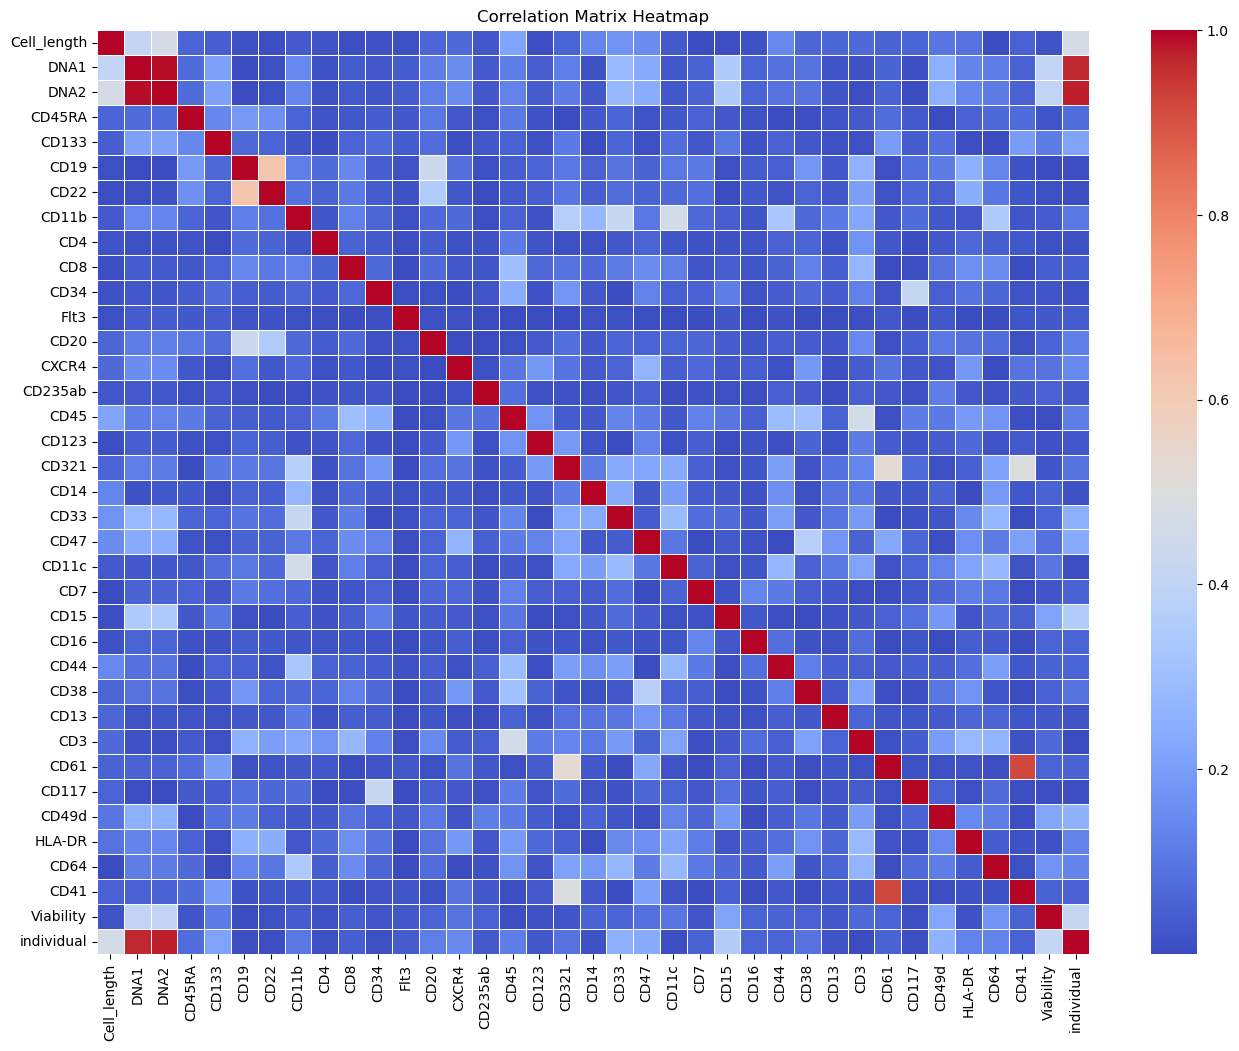

Columns removed due to high correlation: ['DNA2', 'CD41', 'individual']
Remaining columns after correlation removal: 34


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_features = df_cleaned.drop(['label'], axis=1)
#print(len(df_cleaned.columns))

corr_matrix = df_features.corr().abs()


plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Features with correlation greater than 0.8/0.9
threshold = 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]


df_reduced_corr = df_features.drop(to_drop, axis=1)


print(f"Columns removed due to high correlation: {to_drop}")
print(f"Remaining columns after correlation removal: {df_reduced_corr.shape[1]}")



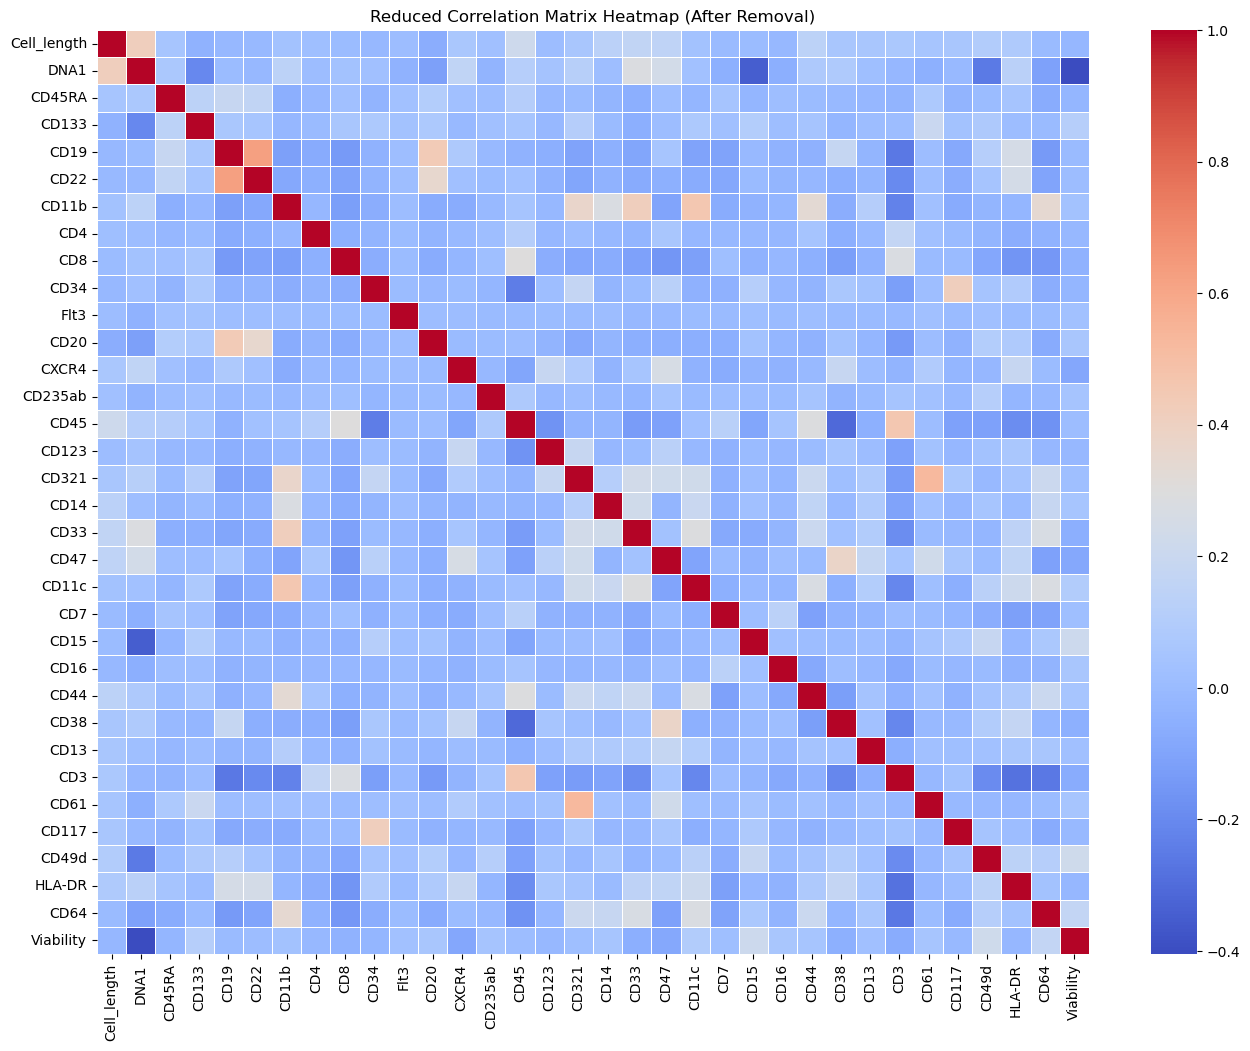

In [7]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_reduced_corr.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Reduced Correlation Matrix Heatmap (After Removal)')
plt.show()

In [8]:
to_drop =['DNA2', 'CD41', 'individual']
df_cleaned_after_corr=df_cleaned.drop(to_drop,axis=1)
print((df_cleaned_after_corr.columns))
print("Total columns are:",len(df_cleaned_after_corr.columns))

Index(['Cell_length', 'DNA1', 'CD45RA', 'CD133', 'CD19', 'CD22', 'CD11b',
       'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab', 'CD45',
       'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7', 'CD15',
       'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
       'HLA-DR', 'CD64', 'Viability', 'label'],
      dtype='object')
Total columns are: 35


In [9]:
from sklearn.feature_selection import VarianceThreshold


df_features = df_cleaned_after_corr.drop(['label'], axis=1)

# Set a variance threshold
selector = VarianceThreshold(threshold=0.000000001)
df_high_variance = selector.fit_transform(df_features)

columns_kept = df_features.columns[selector.get_support()]


df_reduced = pd.DataFrame(df_high_variance, columns=columns_kept)
print(f"Remaining columns after low variance removal: {len(columns_kept)}")
print(df_reduced.columns)

Remaining columns after low variance removal: 34
Index(['Cell_length', 'DNA1', 'CD45RA', 'CD133', 'CD19', 'CD22', 'CD11b',
       'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab', 'CD45',
       'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7', 'CD15',
       'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
       'HLA-DR', 'CD64', 'Viability'],
      dtype='object')


Outliers detected in CD61: 26345
Outliers detected in CD44: 12407
Outliers detected in CD38: 39559
Outliers detected in Flt3: 15161


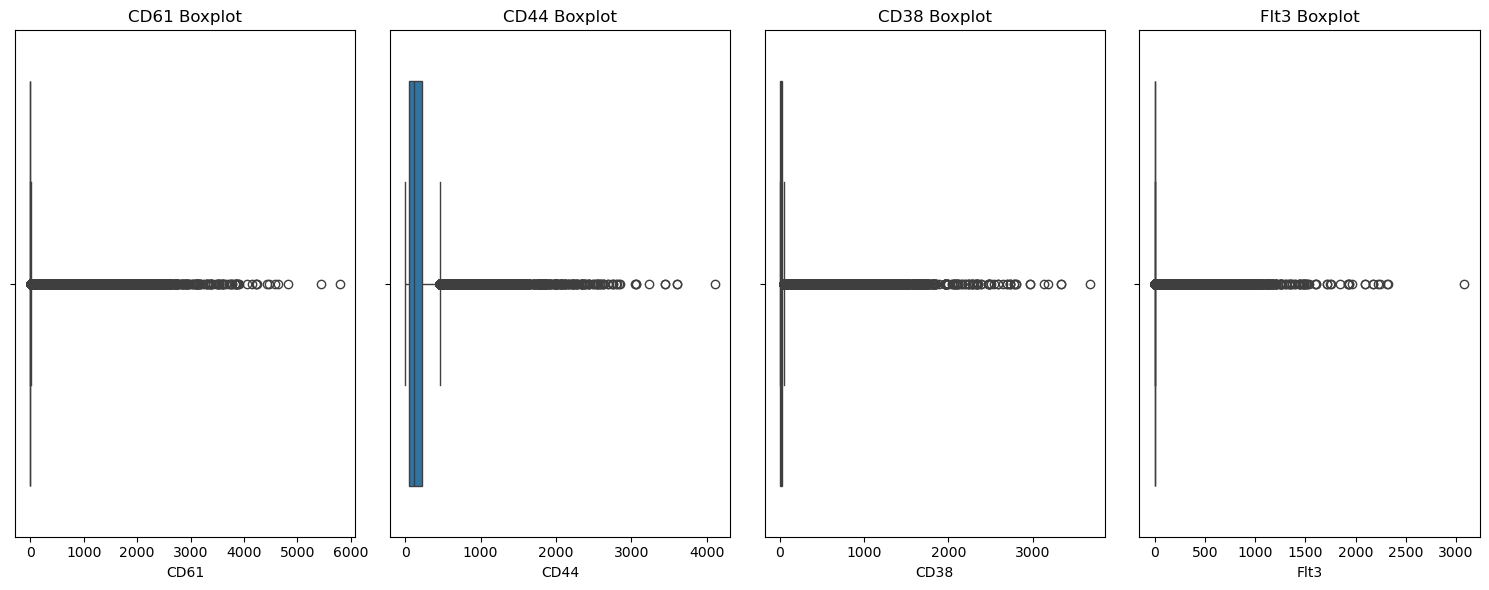

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


features = ['CD61', 'CD44', 'CD38', 'Flt3']


def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    print(f"Outliers detected in {feature}: {len(outliers)}")

    return outliers


plt.figure(figsize=(15, 6))

for i, feature in enumerate(features):
    
    outliers = detect_outliers_iqr(df_cleaned_after_corr, feature)
    
    
    plt.subplot(1, len(features), i+1)  # Create a subplot for each feature
    sns.boxplot(x=df_cleaned_after_corr[feature])
    plt.title(f'{feature} Boxplot')

plt.tight_layout()
plt.show()

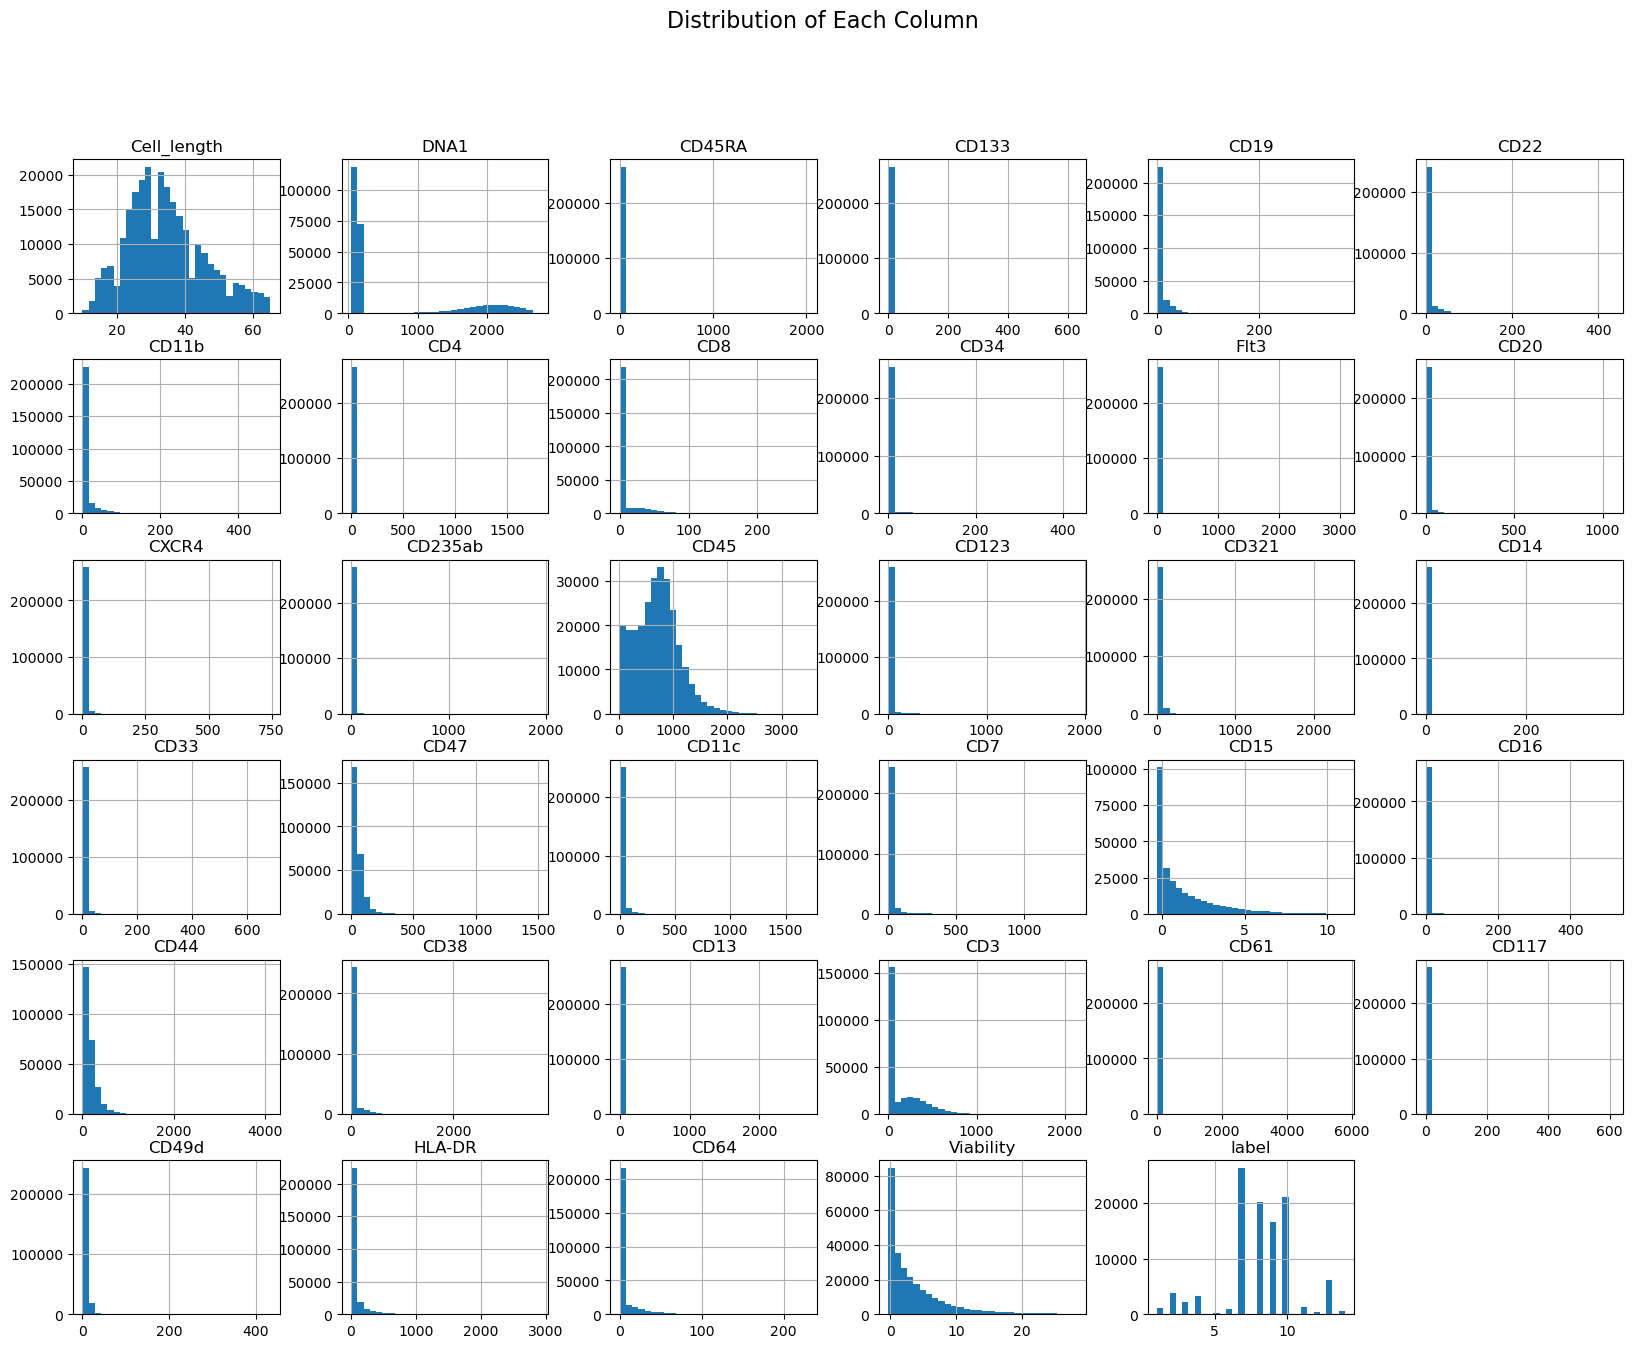

In [11]:
df_cleaned_after_corr.hist(figsize=(20, 15), bins=30)
plt.suptitle("Distribution of Each Column", fontsize=16)
plt.show()

               Skewness                   Category
Cell_length    0.527832               Right-skewed
DNA1           1.155424               Right-skewed
CD45RA        65.251655               Right-skewed
CD133        126.096395               Right-skewed
CD19           4.007221               Right-skewed
CD22           6.131244               Right-skewed
CD11b          5.264678               Right-skewed
CD4          114.022325               Right-skewed
CD8            3.313920               Right-skewed
CD34           8.397363               Right-skewed
Flt3          26.230625               Right-skewed
CD20          10.655454               Right-skewed
CXCR4         14.332247               Right-skewed
CD235ab       35.288190               Right-skewed
CD45           0.514492               Right-skewed
CD123         13.956222               Right-skewed
CD321         15.415273               Right-skewed
CD14          74.327532               Right-skewed
CD33          11.659128        

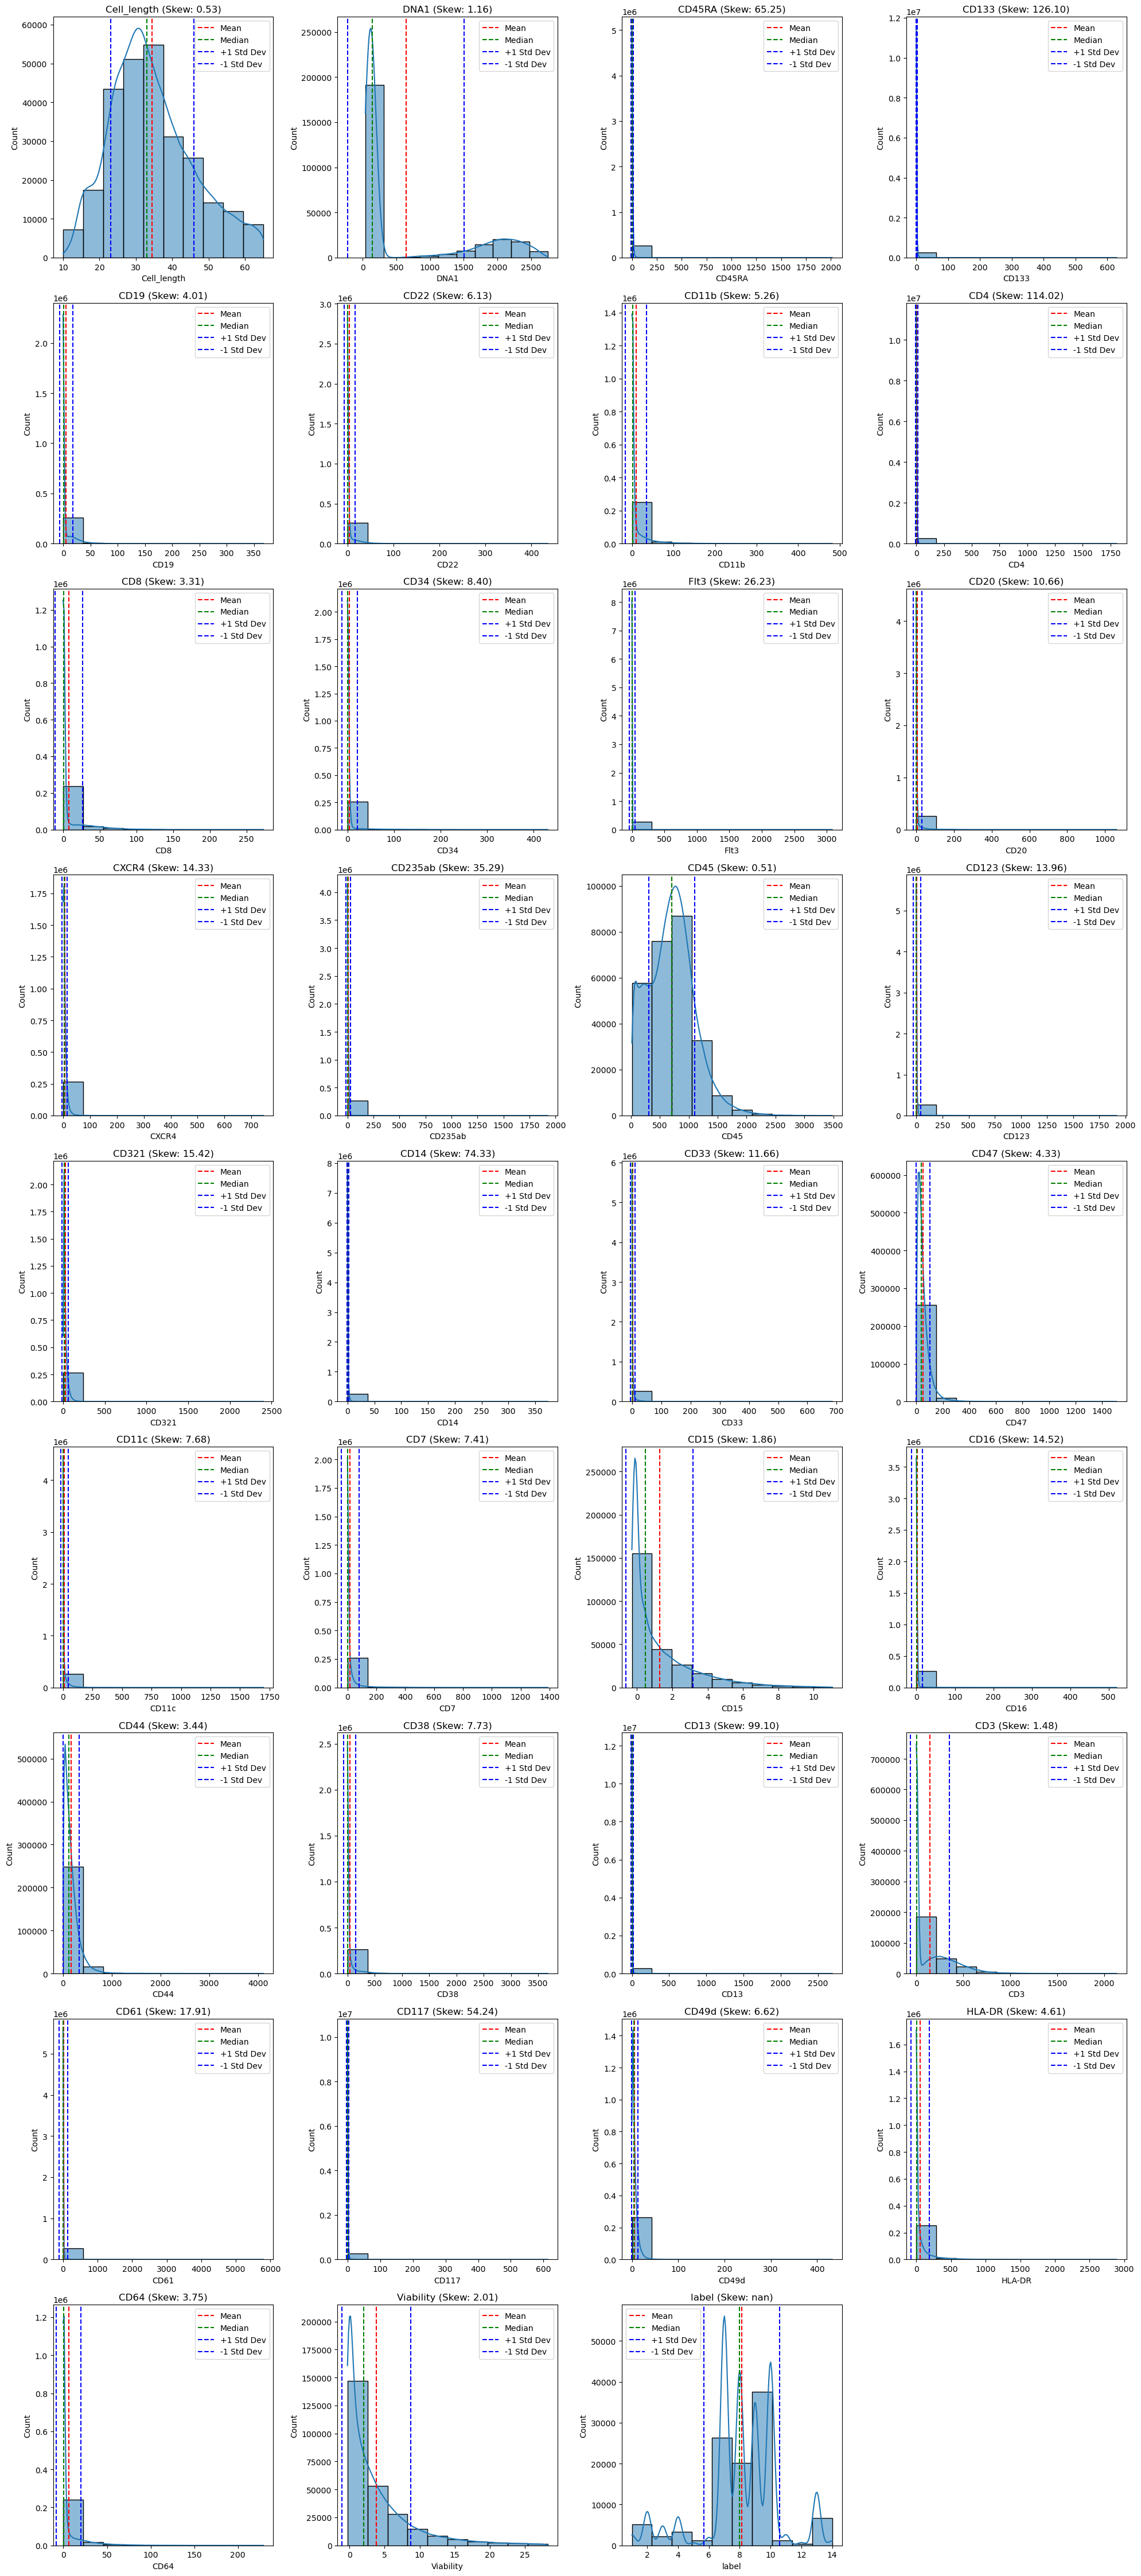

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew


skewness = df_cleaned_after_corr.apply(skew)


def categorize_skewness(value):
    if value > 0.5:
        return 'Right-skewed'
    elif value < -0.5:
        return 'Left-skewed'
    else:
        return 'Approximately symmetrical'


skewness_category = skewness.apply(categorize_skewness)


skewness_df = pd.DataFrame({'Skewness': skewness, 'Category': skewness_category})
print(skewness_df)


n_cols = 4  
n_rows = len(df_cleaned_after_corr.columns) // n_cols + (len(df_cleaned_after_corr.columns) % n_cols > 0)


plt.figure(figsize=(20, n_rows * 5))


for i, col in enumerate(df_cleaned_after_corr.columns):
    mean = df_cleaned_after_corr[col].mean()
    median = df_cleaned_after_corr[col].median()
    std_dev = df_cleaned_after_corr[col].std()  

    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df_cleaned_after_corr[col], bins=10, kde=True)
    plt.title(f'{col} (Skew: {skewness[col]:.2f})')
    
    
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.axvline(median, color='green', linestyle='--', label='Median')
    plt.axvline(mean + std_dev, color='blue', linestyle='--', label='+1 Std Dev')
    plt.axvline(mean - std_dev, color='blue', linestyle='--', label='-1 Std Dev')
    plt.legend()


plt.tight_layout()
plt.show()

In [13]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
import sklearn

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [15]:
df_cleaned_after = df.drop(columns=[ 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual'])


len(df_cleaned_after.columns)

35

In [17]:
# Separate features and labels
features = df_cleaned_after
labels = df['label']

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 215000 samples in 0.025s...
[t-SNE] Computed neighbors for 215000 samples in 116.120s...
[t-SNE] Computed conditional probabilities for sample 1000 / 215000
[t-SNE] Computed conditional probabilities for sample 2000 / 215000
[t-SNE] Computed conditional probabilities for sample 3000 / 215000
[t-SNE] Computed conditional probabilities for sample 4000 / 215000
[t-SNE] Computed conditional probabilities for sample 5000 / 215000
[t-SNE] Computed conditional probabilities for sample 6000 / 215000
[t-SNE] Computed conditional probabilities for sample 7000 / 215000
[t-SNE] Computed conditional probabilities for sample 8000 / 215000
[t-SNE] Computed conditional probabilities for sample 9000 / 215000
[t-SNE] Computed conditional probabilities for sample 10000 / 215000
[t-SNE] Computed conditional probabilities for sample 11000 / 215000
[t-SNE] Computed conditional probabilities for sample 12000 / 215000
[t-SNE] Computed conditional proba

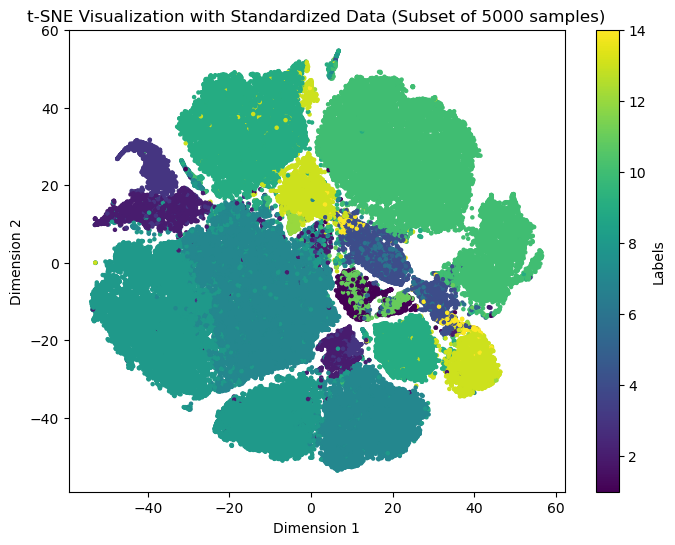

In [24]:
import numpy as np
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)


n_samples = 215000  
subset_indices = np.random.choice(len(features_standardized), n_samples, replace=False)


subset_features = features_standardized[subset_indices]
subset_labels = labels[subset_indices]


tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500, verbose=1)
tsne_result = tsne.fit_transform(subset_features)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=subset_labels, cmap='viridis', s=5)
plt.title('t-SNE Visualization with Standardized Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.colorbar(scatter, label='Labels')
plt.show()

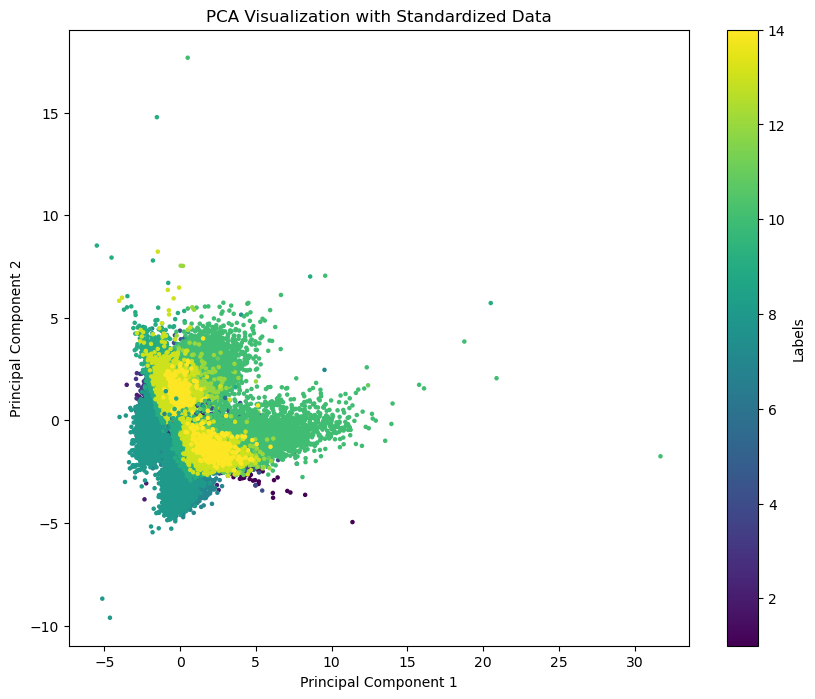

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_standardized)  # Use 'features_standardized'

# Step 2: Create a scatter plot for PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', s=5)
plt.title('PCA Visualization with Standardized Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Step 3: Add color bar
plt.colorbar(scatter, label='Labels')
plt.show()


In [18]:
import numpy as np

# Sample data (replace with your actual data)
data = np.array([10, 25, 5, 18, 30])

# Define a threshold for the mask
threshold = 20

# Create the binary mask
mask = data > threshold  # Creates a mask where values above the threshold are True

# Apply the mask to the data
masked_data = data[mask]  # Selects elements where the mask is True

# Print the results
print("Original data:", data)
print("Mask:", mask)
print("Masked data:", masked_data)

Original data: [10 25  5 18 30]
Mask: [False  True False False  True]
Masked data: [25 30]


In [19]:
import numpy as np

# Sample data (replace with your actual data)
x = np.array([10, 25, 5])

# Define probabilities for each element of x [1, 0, 1]
p_m = np.array([1, 0, 1])

# Create the binary mask using binomial distribution
mask = np.random.binomial(1, p_m, x.shape)

# Apply the mask to the data
masked_data = x * mask # Apply mask by element-wise multiplication

# Print the results
print("Original data (x):", x)
print("Mask:", mask)
print("Masked data:", masked_data)

Original data (x): [10 25  5]
Mask: [1 0 1]
Masked data: [10  0  5]


In [20]:
import numpy as np
import pandas as pd

#Example DataFrame (replace with your actual dataset)

data=pd.DataFrame({
    'Cell_length': np.random.randint(1, 100, 10),
    'DNA1': np.random.rand(10),
    'DNA2': np.random.rand(10),
    'CD45RA': np.random.rand(10),
    'CD133': np.random.rand(10),
    'label': np.random.choice([0, 1], 10) # Binary label column
})

# Convert DataFrame to a NumPy array for easier manipulation

data_np = data.values

# Set the masking probability p_m 0.5 # probability of keeping a value (set to 1)
p_m=0.5

#Generate binary mask with np.random.binomial

# This creates a mask with 1s and es, where 1 appears with probability p_m

mask=np.random.binomial(1, p_m, data_np.shape)

#Apply the binary mask to the data

masked_data = data_np*mask

masked_data_df = pd.DataFrame (masked_data, columns=data.columns)
#Convent back to DataFrame if needed
print("Driginal Data: \n", data)

print("\Binary Mask: \n", mask)

print("\nMasked Data:\n", masked_data_df)

Driginal Data: 
    Cell_length      DNA1      DNA2    CD45RA     CD133  label
0           55  0.973203  0.777926  0.028634  0.559562      1
1           12  0.720712  0.413599  0.996692  0.534114      0
2           42  0.138766  0.015943  0.264593  0.163496      0
3           75  0.581832  0.883218  0.205317  0.018088      1
4           54  0.158736  0.051293  0.847814  0.752466      1
5           15  0.884999  0.362766  0.468899  0.633382      1
6           68  0.569302  0.117803  0.267111  0.970216      1
7           66  0.493073  0.371853  0.192895  0.217843      0
8           11  0.387975  0.470872  0.066506  0.325118      0
9           50  0.334597  0.449961  0.081500  0.272495      0
\Binary Mask: 
 [[1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 1 1 0]
 [0 1 1 1 0 1]
 [0 1 1 0 1 0]
 [1 1 1 0 1 1]
 [0 1 1 0 1 1]
 [0 1 1 0 1 1]
 [0 1 1 1 1 1]]

Masked Data:
    Cell_length      DNA1      DNA2    CD45RA     CD133  label
0         55.0  0.000000  0.000000  0.000000  0.000000   

<>:36: SyntaxWarning: invalid escape sequence '\B'
<>:36: SyntaxWarning: invalid escape sequence '\B'
C:\Users\CHINTU\AppData\Local\Temp\ipykernel_23748\448076341.py:36: SyntaxWarning: invalid escape sequence '\B'
  print("\Binary Mask: \n", mask)


In [21]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': ['p', 'q', 'r', 's', 't'],
    'C': [10, 20, 30, 40, 50]
}

df = pd.DataFrame(data)

# Shuffling
shuffled_df = df.apply(lambda x: np.random.permutation(x))

print("Original DataFrame:")
print(df)

print("\nShuffled DataFrame:")
print(shuffled_df)

Original DataFrame:
   A  B   C
0  1  p  10
1  2  q  20
2  3  r  30
3  4  s  40
4  5  t  50

Shuffled DataFrame:
   A  B   C
0  4  r  10
1  1  q  40
2  5  t  30
3  2  s  50
4  3  p  20


In [22]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': ['p', 'q', 'r', 's', 't'],
    'C': [10, 20, 30, 40, 50]
}

df = pd.DataFrame(data)

# Create corrupted DataFrame and store the shuffled DataFrame
corrupted_df = df.copy()
shuffled_df = df.copy()
for col in df.columns:
    # Shuffle column values and store them in shuffled_df
    shuffled_values = np.random.permutation(df[col].values)
    shuffled_df[col] = shuffled_values  # Assign shuffled values to shuffled_df
    # Create a mask for the column
    mask = np.random.rand(len(df)) < 0.5
    # Apply corruption using the mask and shuffled values
    corrupted_df.loc[mask, col] = shuffled_values[mask]

print("Original DataFrame:")
print(df)

print("\nShuffled DataFrame:")
print(shuffled_df)

print("\nCorrupted DataFrame:")
print(corrupted_df)

Original DataFrame:
   A  B   C
0  1  p  10
1  2  q  20
2  3  r  30
3  4  s  40
4  5  t  50

Shuffled DataFrame:
   A  B   C
0  3  p  40
1  1  s  10
2  4  q  30
3  2  t  20
4  5  r  50

Corrupted DataFrame:
   A  B   C
0  1  p  10
1  2  q  10
2  4  q  30
3  2  s  20
4  5  r  50


In [23]:
import pandas as pd
import numpy as np

def corrupt_data(df, corruption_prob=0.5):

    corrupted_df = df.copy()
    for col in df.columns:
        # Create a mask for the column
        mask = np.random.rand(len(df)) < corruption_prob
        # Shuffle column values
        shuffled_values = np.random.permutation(df[col].values)
        # Apply corruption using the mask and shuffled values
        corrupted_df.loc[mask, col] = shuffled_values[mask]

    return corrupted_df

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': ['p', 'q', 'r', 's', 't'],
    'C': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)

# Apply the function to the sample DataFrame
df_corrupted = corrupt_data(df, corruption_prob=0.3)  # 30% corruption probability

# Print the original and corrupted DataFrames
print("Original DataFrame:")
print(df)
print("\nCorrupted DataFrame:")
print(df_corrupted)

Original DataFrame:
   A  B   C
0  1  p  10
1  2  q  20
2  3  r  30
3  4  s  40
4  5  t  50

Corrupted DataFrame:
   A  B   C
0  1  p  10
1  2  q  40
2  3  r  20
3  4  s  40
4  5  t  10


In [24]:
import pandas as pd
import numpy as np

def corrupt_data(df, corruption_prob=0.5):

    corrupted_df = df.copy()
    for col in df.columns:
        # Create a mask for the column
        mask = np.random.rand(len(df)) < corruption_prob
        # Shuffle column values
        shuffled_values = np.random.permutation(df[col].values)
        # Apply corruption using the mask and shuffled values
        corrupted_df.loc[mask, col] = shuffled_values[mask]

    return corrupted_df

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': ['p', 'q', 'r', 's', 't'],
    'C': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)

# Apply the function to the sample DataFrame
df_corrupted = corrupt_data(df, corruption_prob=0.3)  # 30% corruption probability
# Generate the mask matrix
mask_new = 1 * (df != df_corrupted)

# Print the mask matrix
print("\nMask Matrix (mask_new):")
print(mask_new)
# Print the original and corrupted DataFrames
print("Original DataFrame:")
print(df)
print("\nCorrupted DataFrame:")
print(df_corrupted)


Mask Matrix (mask_new):
   A  B  C
0  0  0  0
1  0  1  0
2  0  0  0
3  0  1  0
4  0  0  0
Original DataFrame:
   A  B   C
0  1  p  10
1  2  q  20
2  3  r  30
3  4  s  40
4  5  t  50

Corrupted DataFrame:
   A  B   C
0  1  p  10
1  2  t  20
2  3  r  30
3  4  p  40
4  5  t  50


In [25]:
import pandas as pd
import numpy as np

def corrupt_data(df, corruption_prob=0.5):

    corrupted_df = df.copy()
    for col in df.columns:
        # Create a mask for the column
        mask = np.random.rand(len(df)) < corruption_prob
        # Shuffle column values
        shuffled_values = np.random.permutation(df[col].values)
        # Apply corruption using the mask and shuffled values
        corrupted_df.loc[mask, col] = shuffled_values[mask]

    return corrupted_df

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': ['p', 'q', 'r', 's', 't'],
    'C': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)

# Apply the function to the sample DataFrame
df_corrupted = corrupt_data(df, corruption_prob=0.3)  # 30% corruption probability
# Get the indices of labeled (corrupted) and unlabeled (uncorrupted) data
labeled_indices = mask_new.any(axis=1)
unlabeled_indices = ~labeled_indices  # Invert the labeled indices

# Create the labeled and unlabeled datasets
x_labeled = df[labeled_indices]
y_labeled = mask_new[labeled_indices]  # Using mask_new as labels
x_unlabeled = df[unlabeled_indices]
y_unlabeled = mask_new[unlabeled_indices]  # Unlabeled data has mask values of 0

# Print the shapes of the datasets
print("Shape of x_labeled:", x_labeled.shape)
print("Shape of y_labeled:", y_labeled.shape)
print("Shape of x_unlabeled:", x_unlabeled.shape)
print("Shape of y_unlabeled:", y_unlabeled.shape)

Shape of x_labeled: (2, 3)
Shape of y_labeled: (2, 3)
Shape of x_unlabeled: (3, 3)
Shape of y_unlabeled: (3, 3)


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def corrupt_data(df, corruption_prob=0.5):
    corrupted_df = df.copy()
    for col in df.columns:
        # Create a mask for the column
        mask = np.random.rand(len(df)) < corruption_prob
        # Shuffle column values
        shuffled_values = np.random.permutation(df[col].values)
        # Apply corruption using the mask and shuffled values
        corrupted_df.loc[mask, col] = shuffled_values[mask]

    return corrupted_df

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': ['p', 'q', 'r', 's', 't'],
    'C': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)

# Apply the function to the sample DataFrame
df_corrupted = corrupt_data(df, corruption_prob=0.3)  # 30% corruption probability

# Generate the mask matrix before using it
mask_new = 1 * (df != df_corrupted) # This line was missing, causing the error

# Get the indices of labeled (corrupted) and unlabeled (uncorrupted) data
labeled_indices = mask_new.any(axis=1)
unlabeled_indices = ~labeled_indices  # Invert the labeled indices

# Create the labeled and unlabeled datasets
x_labeled = df[labeled_indices]
y_labeled = mask_new[labeled_indices]  # Using mask_new as labels
x_unlabeled = df[unlabeled_indices]
y_unlabeled = mask_new[unlabeled_indices]  # Unlabeled data has mask values of 0

# 1. Split into labeled and unlabeled data
labeled_indices = (df != df_corrupted).any(axis=1) # Comparing df and df_corrupted
unlabeled_indices = ~labeled_indices

x_labeled = df[labeled_indices]
y_labeled = (df != df_corrupted)[labeled_indices].astype(int) # Create labels (1 for corrupted, 0 for not corrupted)
x_unlabeled = df[unlabeled_indices]
y_unlabeled = (df != df_corrupted)[unlabeled_indices].astype(int) # Labels for unlabeled data (all 0)

# 2. Split labeled data into train and test sets (70/30 ratio)
x_train, x_test, y_train, y_test = train_test_split(
    x_labeled, y_labeled, test_size=0.3, random_state=42
)
# Print the datasets
print("\nLabeled Data (x_labeled):")
print(x_labeled)
print("\nLabels for Labeled Data (y_labeled):")
print(y_labeled)
print("\nUnlabeled Data (x_unlabeled):")
print(x_unlabeled)
print("\nLabels for Unlabeled Data (y_unlabeled):")
print(y_unlabeled)

print("\nTraining Data (x_train):")
print(x_train)
print("\nTraining Labels (y_train):")
print(y_train)
print("\nTesting Data (x_test):")
print(x_test)
print("\nTesting Labels (y_test):")
print(y_test)


Labeled Data (x_labeled):
   A  B   C
2  3  r  30
3  4  s  40
4  5  t  50

Labels for Labeled Data (y_labeled):
   A  B  C
2  1  0  0
3  1  0  1
4  1  0  0

Unlabeled Data (x_unlabeled):
   A  B   C
0  1  p  10
1  2  q  20

Labels for Unlabeled Data (y_unlabeled):
   A  B  C
0  0  0  0
1  0  0  0

Training Data (x_train):
   A  B   C
3  4  s  40
4  5  t  50

Training Labels (y_train):
   A  B  C
3  1  0  1
4  1  0  0

Testing Data (x_test):
   A  B   C
2  3  r  30

Testing Labels (y_test):
   A  B  C
2  1  0  0


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def corrupt_data(df, corruption_prob=0.5):
    corrupted_df = df.copy()
    for col in df.columns:
        # Create a mask for the column
        mask = np.random.rand(len(df)) < corruption_prob
        # Shuffle column values
        shuffled_values = np.random.permutation(df[col].values)
        # Apply corruption using the mask and shuffled values
        corrupted_df.loc[mask, col] = shuffled_values[mask]

    return corrupted_df

# Load the Levine_32 dataset
df_levine = pd.read_csv('Levine.csv')

# Apply the corrupt_data function to the Levine_32 dataset
df_levine_corrupted = corrupt_data(df_levine, corruption_prob=0.3)

# Generate the mask matrix
mask_levine = 1 * (df_levine != df_levine_corrupted)

# Get the indices of labeled (corrupted) and unlabeled (uncorrupted) data
labeled_indices_levine = mask_levine.any(axis=1)
unlabeled_indices_levine = ~labeled_indices_levine

# Create the labeled and unlabeled datasets for Levine_32
x_labeled_levine = df_levine[labeled_indices_levine]
y_labeled_levine = mask_levine[labeled_indices_levine]
x_unlabeled_levine = df_levine[unlabeled_indices_levine]
y_unlabeled_levine = mask_levine[unlabeled_indices_levine]

# Split labeled data into train and test sets (70/30 ratio)
x_train_levine, x_test_levine, y_train_levine, y_test_levine = train_test_split(
    x_labeled_levine, y_labeled_levine, test_size=0.3, random_state=42
)

# Print the shapes of the datasets to verify
print("Shape of x_train_levine:", x_train_levine.shape)
print("Shape of y_train_levine:", y_train_levine.shape)
print("Shape of x_test_levine:", x_test_levine.shape)
print("Shape of y_test_levine:", y_test_levine.shape)

Shape of x_train_levine: (185938, 41)
Shape of y_train_levine: (185938, 41)
Shape of x_test_levine: (79689, 41)
Shape of y_test_levine: (79689, 41)


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def corrupt_data(df, corruption_prob=0.5):
    corrupted_df = df.copy()
    for col in df.columns:

        mask = np.random.rand(len(df)) < corruption_prob

        shuffled_values = np.random.permutation(df[col].values)

        corrupted_df.loc[mask, col] = shuffled_values[mask]

    return corrupted_df


df = pd.read_csv('Levine.csv')

df_corrupted = corrupt_data(df, corruption_prob=0.3)


mask_new = 1 * (df != df_corrupted)

labeled_indices = mask_new.any(axis=1)
unlabeled_indices = ~labeled_indices

x_labeled = df[labeled_indices]
y_labeled = mask_new[labeled_indices].astype(int)
x_unlabeled = df[unlabeled_indices]
y_unlabeled = mask_new[unlabeled_indices].astype(int)

x_train, x_test, y_train, y_test = train_test_split(
    x_labeled, y_labeled, test_size=0.3, random_state=42
)

print("\nLabeled Data (x_labeled):")
print(x_labeled)
print("\nLabels for Labeled Data (y_labeled):")
print(y_labeled)
print("\nUnlabeled Data (x_unlabeled):")
print(x_unlabeled)
print("\nLabels for Unlabeled Data (y_unlabeled):")
print(y_unlabeled)

print("\nTraining Data (x_train):")
print(x_train)
print("\nTraining Labels (y_train):")
print(y_train)
print("\nTesting Data (x_test):")
print(x_test)
print("\nTesting Labels (y_test):")
print(y_test)


Labeled Data (x_labeled):
               Time  Cell_length         DNA1         DNA2     CD45RA  \
0         2693.0000           22   201.783295   253.016647   0.817049   
1         3736.0000           35   191.828598   308.869080   3.801385   
2         7015.0000           32   116.111923   200.839218   3.204439   
3         7099.0000           29   176.248505   313.022461   2.237382   
4         7700.0000           25   133.332779   226.467758  -0.044047   
...             ...          ...          ...          ...        ...   
265622  707951.4375           41  2305.191162  3131.641357  10.345075   
265623  708145.4375           45  2217.376953  3198.114258   0.585101   
265624  708398.4375           41  2455.673340  3157.416260   3.698715   
265625  708585.4375           39  2395.883789  3167.325439   1.463955   
265626  709122.4375           41  2450.653320  3113.955078   1.843143   

           CD133      CD19      CD22       CD11b        CD4  ...     CD117  \
0      -0.147947 -

In [32]:
import pandas as pd
import numpy as np

# Load the CSV file into the DataFrame first
df = pd.read_csv('Levine.csv')
print(df.head())

# Check if 'label' column exists. If not, handle it accordingly.
if 'label' in df.columns:
  label_column = 'label' # Assign 'label' to label_column if it exists
else:
  print(f"Label column 'label' not found in the dataset. Using index instead.")
  label_column = df.index

label_column = 'label' if 'label' in df.columns else None

# If the label column is None (i.e. it wasn't found)
if label_column is None:
    print(f"Label column 'label' not found in the dataset. Using index instead.")
    # If we want to proceed with index as 'label', we can create a new column:
    df['label'] = df.index
    label_column = 'label'  # Update label_column to reflect the new column
else:
    print("Label column found in the dataset.")


     Time  Cell_length        DNA1        DNA2    CD45RA     CD133      CD19  \
0  2693.0           22  201.783295  253.016647  0.817049 -0.147947 -0.033482   
1  3736.0           35  191.828598  308.869080  3.801385 -0.191446 -0.083274   
2  7015.0           32  116.111923  200.839218  3.204439 -0.161106  0.369613   
3  7099.0           29  176.248505  313.022461  2.237382 -0.138071 -0.088311   
4  7700.0           25  133.332779  226.467758 -0.044047 -0.151509  0.402548   

       CD22     CD11b       CD4  ...     CD117      CD49d     HLA-DR  \
0  0.332183 -0.045922  1.858334  ...  0.265375   4.804858  12.734092   
1  0.372388  4.494379 -0.177158  ...  0.448901   0.995556   2.558165   
2 -0.214952 -0.009404 -0.043904  ...  0.231194  33.025459   8.574364   
3 -0.220430  4.006598 -0.095335  ...  0.332596   8.879428   0.704930   
4  2.581769  6.742060  2.906627  ... -0.031117   0.909562   0.993077   

       CD64      CD41  Viability  file_number  event_number  label  individual  
0 -0.

In [35]:
import pandas as pd
import numpy as np

label_column = 'label'

# Create or load your DataFrame here
# Replace 'your_data.csv' with the actual path to your data file if loading from a file
# new_df = pd.read_csv('your_data.csv')
# Or create a DataFrame from other sources, e.g.,:
df = pd.read_csv('Levine.csv')

# Check if the label column exists
if label_column in df.columns:
    # Split the data based on the presence of labels
    labeled_data = df.dropna(subset=[label_column])
    unlabeled_data = df[df[label_column].isna()]

    # Optional: Drop the label column from the unlabeled data (as they are not needed)
    unlabeled_data = unlabeled_data.drop(columns=[label_column])

    print("Labeled Data:")
    print(labeled_data.head())
    print("\nUnlabeled Data:")
    print(unlabeled_data.head())
else:
    print(f"Label column '{label_column}' not found in the dataset.")

Labeled Data:
     Time  Cell_length        DNA1        DNA2    CD45RA     CD133      CD19  \
0  2693.0           22  201.783295  253.016647  0.817049 -0.147947 -0.033482   
1  3736.0           35  191.828598  308.869080  3.801385 -0.191446 -0.083274   
2  7015.0           32  116.111923  200.839218  3.204439 -0.161106  0.369613   
3  7099.0           29  176.248505  313.022461  2.237382 -0.138071 -0.088311   
4  7700.0           25  133.332779  226.467758 -0.044047 -0.151509  0.402548   

       CD22     CD11b       CD4  ...     CD117      CD49d     HLA-DR  \
0  0.332183 -0.045922  1.858334  ...  0.265375   4.804858  12.734092   
1  0.372388  4.494379 -0.177158  ...  0.448901   0.995556   2.558165   
2 -0.214952 -0.009404 -0.043904  ...  0.231194  33.025459   8.574364   
3 -0.220430  4.006598 -0.095335  ...  0.332596   8.879428   0.704930   
4  2.581769  6.742060  2.906627  ... -0.031117   0.909562   0.993077   

       CD64      CD41  Viability  file_number  event_number  label  indi

In [36]:
from sklearn.model_selection import train_test_split

label_column = 'label'

# Separate features (X) and labels (y) from the labeled data
x = labeled_data.drop(columns=[label_column])
y = labeled_data[label_column]

# Split the labeled data into 70% training and 30% test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Training features (X_train):")
print(x_train.head())
print("\nTest features (X_test):")
print(x_test.head())
print("\nTraining labels (y_train):")
print(y_train.head())
print("\nTest labels (y_test):")
print(y_test.head())
print("\nShape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("shape of X", x.shape)
print("shape of y", y.shape)

Training features (X_train):
              Time  Cell_length         DNA1         DNA2    CD45RA     CD133  \
64113  401196.0000           25   123.413055   247.264938  5.697453  1.537298   
82744  502826.4375           31  1824.911621  2485.373047  2.224972 -0.264615   
24294  488377.0000           41    86.404358   217.855179  1.931000  1.104188   
7820   225689.0000           38   185.181335   329.612823  1.003372  0.504241   
43295  153333.0000           26   160.022964   322.868805  4.651943  0.963454   

            CD19       CD22      CD11b        CD4  ...      CD61     CD117  \
64113   0.776895  -0.058380  60.027130  10.251992  ...  0.257436 -0.018399   
82744  -0.188495  -0.148595  -0.204285   5.235657  ... -0.182192  0.108452   
24294   1.239756   0.972672   0.375968   5.396508  ...  5.902143  2.086974   
7820   -0.129074  -0.014492   9.928773  -0.067003  ... -0.036411  9.755383   
43295  18.185394  73.916107   0.900901   0.577431  ... -0.203828  0.304908   

           CD49

In [37]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np

# Generate a synthetic dataset for demonstration
x, y = make_classification(n_samples=100, n_features=10, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def logistic_regression_with_outputs(x_train, y_train, x_test):
    """
    Implements Logistic Regression and returns output probabilities.

    Args:
        x_train, y_train: Training data.
        x_test: Testing data.

    Returns:
        y_pred_prob: Predicted probabilities for x_test.
    """
    # Create and train the Logistic Regression model
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # Predict probabilities on the test data
    y_pred_prob = model.predict_proba(x_test)

    # Print the output probabilities
    print("Logistic Regression Output Probabilities:")
    print(y_pred_prob)

    return y_pred_prob

def xgboost_with_outputs(x_train, y_train, x_test):
    """
    Implements XGBoost and returns output probabilities.

    Args:
        x_train, y_train: Training data.
        x_test: Testing data.

    Returns:
        y_pred_prob: Predicted probabilities for x_test.
    """
    # Create and train the XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(x_train, y_train)

    # Predict probabilities on the test data
    y_pred_prob = model.predict_proba(x_test)

    # Print the output probabilities
    print("\nXGBoost Output Probabilities:")
    print(y_pred_prob)

    return y_pred_prob

# Call the Logistic Regression function and print results
y_pred_prob_logistic = logistic_regression_with_outputs(x_train, y_train, x_test)
print("\nFinal Logistic Regression Probabilities:")
print(y_pred_prob_logistic)

# Call the XGBoost function and print results
y_pred_prob_xgboost = xgboost_with_outputs(x_train, y_train, x_test)
print("\nFinal XGBoost Probabilities:")
print(y_pred_prob_xgboost)

Logistic Regression Output Probabilities:
[[9.04675251e-01 9.53247494e-02]
 [7.97965075e-02 9.20203492e-01]
 [1.33736145e-02 9.86626386e-01]
 [7.86373395e-02 9.21362661e-01]
 [2.07691091e-02 9.79230891e-01]
 [9.72546031e-01 2.74539693e-02]
 [9.78171609e-01 2.18283908e-02]
 [2.54443533e-01 7.45556467e-01]
 [2.14117582e-01 7.85882418e-01]
 [1.65396820e-01 8.34603180e-01]
 [9.88737978e-01 1.12620223e-02]
 [2.80587665e-03 9.97194123e-01]
 [7.85824805e-04 9.99214175e-01]
 [9.99130522e-01 8.69477913e-04]
 [5.13601693e-03 9.94863983e-01]
 [9.67299512e-01 3.27004880e-02]
 [3.91255210e-02 9.60874479e-01]
 [9.82741573e-01 1.72584274e-02]
 [9.69083770e-01 3.09162297e-02]
 [9.97698675e-01 2.30132477e-03]]

Final Logistic Regression Probabilities:
[[9.04675251e-01 9.53247494e-02]
 [7.97965075e-02 9.20203492e-01]
 [1.33736145e-02 9.86626386e-01]
 [7.86373395e-02 9.21362661e-01]
 [2.07691091e-02 9.79230891e-01]
 [9.72546031e-01 2.74539693e-02]
 [9.78171609e-01 2.18283908e-02]
 [2.54443533e-01 7.45556

C:\Users\CHINTU\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:00:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [38]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss # Import log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np

# Generate a synthetic dataset for demonstration
x, y = make_classification(n_samples=100, n_features=10, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def logistic_regression_with_outputs(x_train, y_train, x_test, y_test): # Added y_test
    """
    Implements Logistic Regression, calculates and prints log loss.

    Args:
        x_train, y_train: Training data.
        x_test, y_test: Testing data.

    Returns:
        y_pred_prob: Predicted probabilities for x_test.
    """
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)

    # Calculate and print log loss
    lr_log_loss = log_loss(y_test, y_pred_prob)
    print(f"Logistic Regression Log Loss: {lr_log_loss}")

    return y_pred_prob

def xgboost_with_outputs(x_train, y_train, x_test, y_test): # Added y_test
    """
    Implements XGBoost, calculates and prints log loss.

    Args:
        x_train, y_train: Training data.
        x_test, y_test: Testing data.

    Returns:
        y_pred_prob: Predicted probabilities for x_test.
    """
    model = XGBClassifier()
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)

    # Calculate and print log loss
    xgb_log_loss = log_loss(y_test, y_pred_prob)
    print(f"XGBoost Log Loss: {xgb_log_loss}")

    return y_pred_prob

# Example usage:
logistic_regression_probs = logistic_regression_with_outputs(x_train, y_train, x_test, y_test) # Pass y_test
xgboost_probs = xgboost_with_outputs(x_train, y_train, x_test, y_test) # Pass y_test

Logistic Regression Log Loss: 0.06050945950379342
XGBoost Log Loss: 0.03575391160039887


In [39]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.metrics import log_loss
import numpy as np

# Define the logistic regression function
def Logistic(x_train, y_train, x_test, y_test):
     # Check and reshape y_train if needed
    if len(y_train.shape) > 1:
        y_train = y_train.ravel()

    # Define and fit the logistic regression model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(x_train, y_train)

    # Predict probabilities on x_test
    y_test_hat = model.predict_proba(x_test)

    # Calculate log loss using the true labels (y_test) and predicted probabilities (y_test_hat)
    loss = log_loss(y_test, y_test_hat)

    return y_test_hat, loss

# Define the XGBoost function
def XGBoost(x_train, y_train, x_test, y_test):
    # Check and reshape y_train if needed
    if len(y_train.shape) > 1:
        y_train = y_train.ravel()

    # Define and fit the XGBoost model
    model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # Initialize XGBClassifier
    model.fit(x_train, y_train)

    # Predict probabilities on x_test
    y_test_hat = model.predict_proba(x_test)

    # Calculate log loss
    loss = log_loss(y_test, y_test_hat)

    return y_test_hat, loss

# Get predicted probabilities and log loss for Logistic Regression
y_test_probabilities_logistic, loss_value_logistic = Logistic(x_train, y_train, x_test, y_test)

# Get predicted probabilities and log loss for XGBoost
y_test_probabilities_xgboost, loss_value_xgboost = XGBoost(x_train, y_train, x_test, y_test)

# Print results
print("Logistic Regression:")
print("Predicted probabilities:\n", y_test_probabilities_logistic)
print("\nLog Loss:", loss_value_logistic)

print("\nXGBoost:")
print("Predicted probabilities:\n", y_test_probabilities_xgboost)
print("\nLog Loss:", loss_value_xgboost)

Logistic Regression:
Predicted probabilities:
 [[9.04675251e-01 9.53247494e-02]
 [7.97965075e-02 9.20203492e-01]
 [1.33736145e-02 9.86626386e-01]
 [7.86373395e-02 9.21362661e-01]
 [2.07691091e-02 9.79230891e-01]
 [9.72546031e-01 2.74539693e-02]
 [9.78171609e-01 2.18283908e-02]
 [2.54443533e-01 7.45556467e-01]
 [2.14117582e-01 7.85882418e-01]
 [1.65396820e-01 8.34603180e-01]
 [9.88737978e-01 1.12620223e-02]
 [2.80587665e-03 9.97194123e-01]
 [7.85824805e-04 9.99214175e-01]
 [9.99130522e-01 8.69477913e-04]
 [5.13601693e-03 9.94863983e-01]
 [9.67299512e-01 3.27004880e-02]
 [3.91255210e-02 9.60874479e-01]
 [9.82741573e-01 1.72584274e-02]
 [9.69083770e-01 3.09162297e-02]
 [9.97698675e-01 2.30132477e-03]]

Log Loss: 0.06050945950379342

XGBoost:
Predicted probabilities:
 [[0.973202   0.02679799]
 [0.05494148 0.9450585 ]
 [0.03825974 0.96174026]
 [0.0221805  0.9778195 ]
 [0.00801504 0.99198496]
 [0.98203075 0.01796927]
 [0.97422457 0.02577544]
 [0.03004247 0.96995753]
 [0.02741474 0.97258526]


C:\Users\CHINTU\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:01:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [42]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

def self_supervised(x_unlabeled, p_m, alpha, parameters):
    # Extract batch_size & epochs
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    _, dimension = x_unlabeled.shape

    # Model creation.
    # Defining an encoder.
    # Auto encoder structure -> corrupted input -> encoder -> latent space -> decoder.
    # Working on the encoder part and extracting the latent space.
    
    # Creating a fully connected network with the number of neurons in the first layer equal to the number of features present in the dataset.
    # Input layer will be of size `dimension` (37 in your case).
    input_layer = Input(shape=(dimension,))
    
    # Encoder model
    h = Dense(int(dimension), activation='relu')(input_layer)

    # Output1 -> Mask estimation
    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)

    # Output2 -> Feature estimation
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

    # Defining the model
    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile the model with correct syntax
    model.compile(
        optimizer="rmsprop", 
        loss={
            'mask_estimation': 'binary_crossentropy', 
            'feature_estimation': 'mean_squared_error'
        },
        loss_weights={
            'mask_estimation': 1, 
            'feature_estimation': alpha
        }
    )

    # Corruption process (you need to implement these functions: binary_mask, corruption)
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)  # returns binary mask with dimensions equal to x_unlabeled
    x_unlabeled_corrupted = corruption(corruption_binary_mask, x_unlabeled)  # return corrupted unlabeled dataset

    # Fit the model
    model.fit(x_unlabeled_corrupted, 
              {'mask_estimation': m_label, 'feature_estimation': x_unlabeled}, 
              epochs=epochs, 
              batch_size=batch_size)

    # Get the layer name and output for the encoder
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    
    # Create the encoder model
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder


In [48]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define binary mask generation function
def binary_mask(p_m, x):
    """
    Generate a binary mask with the same shape as x, where each element is set to 0 with probability p_m.
    """
    return np.random.binomial(1, 1 - p_m, x.shape)

# Define corruption function
def corruption(mask, x):
    """
    Apply the mask to x, setting masked elements to 0 to simulate corrupted input.
    """
    return x * mask

# Define the self-supervised function
def self_supervised(x_unlabeled, p_m, alpha, parameters):
    # Extract batch_size and epochs from parameters
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    learning_rate = parameters['learning_rate']
    hidden_units = parameters['hidden']
    _, dimension = x_unlabeled.shape

    # Input layer
    input_layer = Input(shape=(dimension,))

    # Encoder layer
    h = Dense(hidden_units, activation='relu')(input_layer)  # Use hidden_units for the number of neurons

    # Output 1 --> mask estimation
    output1 = Dense(dimension, activation='sigmoid', name='mask_estimation')(h)

    # Output 2 --> feature estimation
    output2 = Dense(dimension, activation='sigmoid', name='feature_estimation')(h)

    # Model definition
    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile the model with custom loss weights as floats
    model.compile(
        optimizer="rmsprop",  # Using the optimizer defined by the user
        loss={'mask_estimation': "binary_crossentropy", 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': float(alpha)}
    )

    # Generate corruption binary mask
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)

    # Corrupt the unlabeled data
    x_unlabeled_corrupted = corruption(corruption_binary_mask, x_unlabeled)

    # Training the model with corrupted data
    history = model.fit(
        x_unlabeled_corrupted,
        {'mask_estimation': corruption_binary_mask, 'feature_estimation': x_unlabeled},
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Extract encoder part of the model
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder, model, history


# Example usage
# Example raw data (replace with your actual data)
x_unlabeled = np.random.rand(100, 37)  # 100 samples, 37 features (replace with your data)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)  # Scaled data

# Masking probability, alpha value, and parameters
p_m = 0.3  # Masking probability
alpha = 2.0  # Weight for feature estimation loss

# Parameters for training
parameters = {
    'batch_size': 128,         # Batch size for training
    'epochs': 50,              # Number of epochs for training
    'learning_rate': 0.001,    # Learning rate for the optimizer
    'hidden': 64               # Number of neurons in the hidden layer
}

# Run self-supervised training
encoder, model, history = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)

# Print the model summary
model.summary()

# Optionally, you can also print the training history
print("Training history:", history.history)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - feature_estimation_loss: 0.7308 - loss: 3.2535 - mask_estimation_loss: 2.5227
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - feature_estimation_loss: 0.7187 - loss: 3.2050 - mask_estimation_loss: 2.4863
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - feature_estimation_loss: 0.7102 - loss: 3.1704 - mask_estimation_loss: 2.4602
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - feature_estimation_loss: 0.7034 - loss: 3.1420 - mask_estimation_loss: 2.4386
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - feature_estimation_loss: 0.6976 - loss: 3.1173 - mask_estimation_loss: 2.4197
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - feature_estimation_loss: 0.6924 - loss: 3.0950 - mask_estimation_loss: 2.4026
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - feature_estimation_loss: 0.6878 - loss: 3.0746 - mask_estimation_loss: 2.3868
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - feature_estimation_loss: 0.6836 - loss: 3.0556 -

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 37)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 64)                │           2,432 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mask_estimation (Dense)       │ (None, 37)                │           2,405 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ feature_estimation (Dense)    │ (None, 37)                │           2,405 │ dense_1[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 14,486 (56.59 KB)

 Trainable params: 7,242 (28.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,244 (28.30 KB)

Training history: {'feature_estimation_loss': [0.7308054566383362, 0.7186968922615051, 0.7102218866348267, 0.7033954858779907, 0.6975703239440918, 0.6924319267272949, 0.6877990961074829, 0.6835570335388184, 0.6796268224716187, 0.6759392023086548, 0.6724578738212585, 0.6691641211509705, 0.6660230159759521, 0.6630027294158936, 0.6601141095161438, 0.6573222875595093, 0.6546334624290466, 0.6520326137542725, 0.649519681930542, 0.6470928192138672, 0.6447486281394958, 0.6424704194068909, 0.6402603983879089, 0.6381112933158875, 0.6360160708427429, 0.6339739561080933, 0.6319794654846191, 0.6300309896469116, 0.6281319260597229, 0.6262706518173218, 0.6244545578956604, 0.6226662993431091, 0.6209198236465454, 0.619209349155426, 0.6175214648246765, 0.6158766746520996, 0.614264726638794, 0.6126804947853088, 0.61112380027771, 0.6095947027206421, 0.6080824732780457, 0.6065925359725952, 0.6051279902458191, 0.6036737561225891, 0.60223388671875, 0.6008142828941345, 0.5994090437889099, 0.5980265140533447, 

In [49]:
x_unlab = x_unlabeled_scaled
p_m = 0.3
alpha = 2.0
parameters = {'batch_size': 128,
              'epochs': 50,
              'learning_rate': 0.001,  # Add learning_rate to the dictionary
              'hidden': 64            # Add hidden to the dictionary
              }

self_supervised(x_unlab,p_m,alpha, parameters)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - feature_estimation_loss: 0.7383 - loss: 3.2913 - mask_estimation_loss: 2.5530
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - feature_estimation_loss: 0.7245 - loss: 3.2401 - mask_estimation_loss: 2.5156
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - feature_estimation_loss: 0.7149 - loss: 3.2036 - mask_estimation_loss: 2.4887
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - feature_estimation_loss: 0.7072 - loss: 3.1738 - mask_estimation_loss: 2.4666
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - feature_estimation_loss: 0.7007 - loss: 3.1480 - mask_estimation_loss: 2.4473
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - feature_estimation_loss: 0.6949 - loss: 3.1247 - mask_estimation_loss: 2.4298
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - feature_estimation_loss: 0.6897 - loss: 3.1034 - mask_estimation_loss: 2.4137
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - feature_estimation_loss: 0.6849 - loss: 3.0836 -

(<Functional name=functional_4, built=True>,
 <Functional name=functional_3, built=True>,
 <keras.src.callbacks.history.History at 0x23a96726480>)

In [50]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define binary mask generation function
def binary_mask(p_m, x):
    """
    Generate a binary mask with the same shape as x, where each element is set to 0 with probability p_m.
    """
    return np.random.binomial(1, 1 - p_m, x.shape)

# Define corruption function
def corruption(mask, x):
    """
    Apply the mask to x, setting masked elements to 0 to simulate corrupted input.
    """
    return x * mask

# Define the self-supervised function
def self_supervised(x_unlabeled, p_m, alpha, parameters):
    # Extract batch_size and epochs from parameters
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    learning_rate = parameters['learning_rate']
    hidden_units = parameters['hidden']
    _, dimension = x_unlabeled.shape

    # Input layer
    input_layer = Input(shape=(dimension,))

    # Encoder layer
    h = Dense(hidden_units, activation='relu')(input_layer)  # Use hidden_units for the number of neurons

    # Output 1 --> mask estimation
    output1 = Dense(dimension, activation='sigmoid', name='mask_estimation')(h)

    # Output 2 --> feature estimation
    output2 = Dense(dimension, activation='sigmoid', name='feature_estimation')(h)

    # Model definition
    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile the model with custom loss weights as floats
    model.compile(
        optimizer="rmsprop",  # Using the optimizer defined by the user
        loss={'mask_estimation': "binary_crossentropy", 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': float(alpha)}
    )

    # Generate corruption binary mask
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)

    # Corrupt the unlabeled data
    x_unlabeled_corrupted = corruption(corruption_binary_mask, x_unlabeled)

    # New mask label for the additional model fitting
    mask_label = corruption(corruption_binary_mask, x_unlabeled)

    # Training the model with corrupted data and mask label
    history = model.fit(
        x_unlabeled_corrupted,
        {'mask_estimation': mask_label, 'feature_estimation': x_unlabeled},
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Extract encoder part of the model
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder, model, history


# Example usage
# Example raw data (replace with your actual data)
x_unlabeled = np.random.rand(100, 37)  # 100 samples, 37 features (replace with your data)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)  # Scaled data

# Masking probability, alpha value, and parameters
p_m = 0.3  # Masking probability
alpha = 2.0  # Weight for feature estimation loss

# Parameters for training
parameters = {
    'batch_size': 128,         # Batch size for training
    'epochs': 50,              # Number of epochs for training
    'learning_rate': 0.001,    # Learning rate for the optimizer
    'hidden': 64               # Number of neurons in the hidden layer
}

# Run self-supervised training
encoder, model, history = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)

# Print the model summary
model.summary()

# Optionally, you can also print the training history
print("Training history:", history.history)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step - feature_estimation_loss: 0.7116 - loss: 3.2816 - mask_estimation_loss: 2.5700
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - feature_estimation_loss: 0.6753 - loss: 3.2104 - mask_estimation_loss: 2.5352
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - feature_estimation_loss: 0.6494 - loss: 3.1598 - mask_estimation_loss: 2.5104
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - feature_estimation_loss: 0.6281 - loss: 3.1180 - mask_estimation_loss: 2.4899
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - feature_estimation_loss: 0.6095 - loss: 3.0814 - mask_estimation_loss: 2.4719
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - feature_estimation_loss: 0.5926 - loss: 3.0482 - mask_estimation_loss: 2.4556
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - feature_estimation_loss: 0.5769 - loss: 3.0174 - mask_estimation_loss: 2.4405
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - feature_estimation_loss: 0.5621 - loss: 2.988

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 37)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 64)                │           2,432 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mask_estimation (Dense)       │ (None, 37)                │           2,405 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ feature_estimation (Dense)    │ (None, 37)                │           2,405 │ dense_3[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 14,486 (56.59 KB)

 Trainable params: 7,242 (28.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,244 (28.30 KB)

Training history: {'feature_estimation_loss': [0.7116380929946899, 0.6752615571022034, 0.649437427520752, 0.6281489729881287, 0.6094841361045837, 0.5925565958023071, 0.5768524408340454, 0.562084972858429, 0.5480077266693115, 0.534512460231781, 0.5214948654174805, 0.5088600516319275, 0.49652567505836487, 0.4844348430633545, 0.4725748300552368, 0.4608957767486572, 0.4493754208087921, 0.43799471855163574, 0.42674505710601807, 0.415627121925354, 0.40462496876716614, 0.3937143385410309, 0.3828795552253723, 0.37210795283317566, 0.36138424277305603, 0.35072967410087585, 0.3401031196117401, 0.32955455780029297, 0.3189961910247803, 0.3084629774093628, 0.29797086119651794, 0.28752753138542175, 0.27713334560394287, 0.26678040623664856, 0.2564506232738495, 0.24612367153167725, 0.23582975566387177, 0.22557665407657623, 0.21535354852676392, 0.20513862371444702, 0.1949281543493271, 0.18470881879329681, 0.17451444268226624, 0.16433578729629517, 0.15416647493839264, 0.1440076231956482, 0.13387583196163

In [51]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define binary mask generation function
def binary_mask(p_m, x):
    """
    Generate a binary mask with the same shape as x, where each element is set to 0 with probability p_m.
    """
    return np.random.binomial(1, 1 - p_m, x.shape)

# Updated corruption function as per the user's provided code
def corruption(mask, data):
    """
    Apply the mask to shuffle data across samples for corruption.
    Returns the new mask and the corrupted data.
    """
    num_samples, num_features = data.shape
    shuffled_data = np.zeros([num_samples, num_features])

    # Shuffle each feature across samples
    for feature_idx in range(num_features):
        shuffled_indices = np.random.permutation(num_samples)
        shuffled_data[:, feature_idx] = data[shuffled_indices, feature_idx]

    # Create corrupted data based on the mask
    data_corrupted = data * (1 - mask) + shuffled_data * mask

    # Create new mask indicating which data points were corrupted
    mask_new = (data != data_corrupted).astype(int)

    return mask_new, data_corrupted

# Define the self-supervised function
def self_supervised(x_unlabeled, p_m, alpha, parameters):
    # Extract batch_size and epochs from parameters
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    learning_rate = parameters['learning_rate']
    hidden_units = parameters['hidden']
    _, dimension = x_unlabeled.shape

    # Input layer
    input_layer = Input(shape=(dimension,))

    # Encoder layer
    h = Dense(hidden_units, activation='relu')(input_layer)  # Use hidden_units for the number of neurons

    # Output 1 --> mask estimation
    output1 = Dense(dimension, activation='sigmoid', name='mask')(h)

    # Output 2 --> feature estimation
    output2 = Dense(dimension, activation='sigmoid', name='feature')(h)

    # Model definition
    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile the model with custom loss weights as floats
    model.compile(
        optimizer="rmsprop",  # Using the optimizer defined by the user
        loss={'mask': "binary_crossentropy", 'feature': 'mean_squared_error'},
        loss_weights={'mask': 1.0, 'feature': float(alpha)}
    )

    # Generate corruption binary mask
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)

    # Corrupt the unlabeled data and obtain new mask
    mask_label, x_unlabeled_corrupted = corruption(corruption_binary_mask, x_unlabeled)

    # Training the model with corrupted data and mask label
    history = model.fit(
        x_unlabeled_corrupted,
        {'mask': mask_label, 'feature': x_unlabeled},
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Extract encoder part of the model
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder, model, history
# Example raw data (replace with your actual data)
x_unlabeled = np.random.rand(100, 37)  # 100 samples, 37 features (replace with your data)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)  # Scaled data

# Masking probability, alpha value, and parameters
p_m = 0.3  # Masking probability
alpha = 2.0  # Weight for feature estimation loss

# Parameters for training
parameters = {
    'batch_size': 128,         # Batch size for training
    'epochs': 50,              # Number of epochs for training
    'learning_rate': 0.001,    # Learning rate for the optimizer
    'hidden': 64               # Number of neurons in the hidden layer
}

# Run self-supervised training
encoder, model, history = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)

# Print the model summary
model.summary()

# Optionally, you can also print the training history
print("Training history:", history.history)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step - feature_loss: 0.7665 - loss: 3.3545 - mask_loss: 2.5880
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - feature_loss: 0.7496 - loss: 3.2937 - mask_loss: 2.5441
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - feature_loss: 0.7381 - loss: 3.2512 - mask_loss: 2.5130
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - feature_loss: 0.7291 - loss: 3.2167 - mask_loss: 2.4876
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - feature_loss: 0.7215 - loss: 3.1871 - mask_loss: 2.4655
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - feature_loss: 0.7149 - loss: 3.1606 - mask_loss: 2.4457
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - feature_loss: 0.7090 - loss: 3.1365 - mask_loss: 2.4275
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - feature_loss: 0.7036 - loss: 3.1142 - mask_loss: 2.4106
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - feature_loss: 0.6987 - loss: 3.0934 - mask_loss: 2.3947
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 37)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 64)                │           2,432 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mask (Dense)                  │ (None, 37)                │           2,405 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ feature (Dense)               │ (None, 37)                │           2,405 │ dense_4[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 14,486 (56.59 KB)

 Trainable params: 7,242 (28.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,244 (28.30 KB)

Training history: {'feature_loss': [0.7665001749992371, 0.749589204788208, 0.7381444573402405, 0.7291204333305359, 0.7215422987937927, 0.7149397134780884, 0.709011435508728, 0.7036320567131042, 0.6986600756645203, 0.6940609812736511, 0.6897528767585754, 0.6856692433357239, 0.6818051338195801, 0.6781280636787415, 0.6746054887771606, 0.6712234020233154, 0.6679809093475342, 0.6648495197296143, 0.6618384718894958, 0.6589158773422241, 0.6560829281806946, 0.6533448100090027, 0.6506863236427307, 0.6481073498725891, 0.6455993056297302, 0.6431448459625244, 0.6407707333564758, 0.6384515166282654, 0.6361913681030273, 0.6339779496192932, 0.6318137049674988, 0.6296972036361694, 0.6276326775550842, 0.6256106495857239, 0.6236318349838257, 0.6216943264007568, 0.6197783946990967, 0.6179039478302002, 0.6160596013069153, 0.6142379641532898, 0.6124420762062073, 0.6106864809989929, 0.6089486479759216, 0.6072266101837158, 0.6055335402488708, 0.6038432121276855, 0.6021775603294373, 0.6005614995956421, 0.5989

In [52]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

def binary_mask(p_m, data):
    """Generates a binary mask with probability p_m."""
    return np.random.binomial(1, 1 - p_m, data.shape)

def corruption(mask, data):
    num_samples, num_features = data.shape
    shuffled_data = np.zeros([num_samples, num_features])

    for feature_idx in range(num_features):
        shuffled_indices = np.random.permutation(num_samples)
        shuffled_data[:, feature_idx] = data[shuffled_indices, feature_idx]

    data_corrupted = data * (1 - mask) + shuffled_data * mask
    mask_new = (data != data_corrupted).astype(int)

    return mask_new, data_corrupted

def self_supervised(x_unlabeled, p_m, alpha, parameters):
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    _, dimension = x_unlabeled.shape

    # Define model architecture
    input_layer = Input(shape=(dimension,))
    h = Dense(int(dimension), activation='relu')(input_layer)

    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

    model = Model(inputs=input_layer, outputs=[output1, output2])

    # Compile model with appropriate loss functions and weights
    model.compile(
        optimizer="rmsprop",
        loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': float(alpha)}  # Corrected to use float
    )

    # Generate corrupted input and mask labels
    corruption_binary_mask = binary_mask(p_m, x_unlabeled)
    x_unlabeled_corrupted,mask_label = corruption(corruption_binary_mask, x_unlabeled)

    assert x_unlabeled_corrupted.shape == mask_label.shape


    # Train model
    model.fit(x_unlabeled_corrupted, {'mask_estimation': mask_label, 'feature_estimation': x_unlabeled},
              epochs=epochs, batch_size=batch_size)

    # Display model summary (this will print the model's parameters)
    model.summary()

    # Define encoder
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Levine.csv')

# Exclude specified columns
exclude_columns = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']

# Check if all columns in exclude_columns are present in the DataFrame
missing_columns = [col for col in exclude_columns if col not in df.columns]

# Print the missing columns, if any
if missing_columns:
    print(f"Warning: The following columns are not found in the DataFrame: {missing_columns}")

# Remove missing columns from exclude_columns
exclude_columns = [col for col in exclude_columns if col in df.columns]

data_filtered = df.drop(columns=exclude_columns)

# Convert all columns to numeric, coercing errors to NaN
for col in data_filtered.columns:
    data_filtered[col] = pd.to_numeric(data_filtered[col], errors='coerce')

# Impute or drop NaN values strategically
# Option 1: Impute with mean/median
# for col in data_filtered.columns:
#     data_filtered[col] = data_filtered[col].fillna(data_filtered[col].mean())

# Option 2: Drop only rows where all values are NaN
# data_filtered = data_filtered.dropna(how='all')

# Option 3: (If a specific column causes most NaNs, and you can drop it):
# data_filtered = data_filtered.drop(columns=['problematic_column']) #Replace problematic_column
# data_filtered = data_filtered.dropna()


# Standardize the data
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(data_filtered)  # Now x_unlabeled_scaled is defined

# Define other parameters
p_m = 0.3
alpha = 2.0
parameters = {
    'batch_size': 128,
    'epochs': 50,
}

# Run the self_supervised function with the scaled data
encoder_model = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)

Epoch 1/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 2s 752us/step - feature_estimation_loss: 0.0637 - loss: 2.0757 - mask_estimation_loss: 2.0120
Epoch 2/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 2s 772us/step - feature_estimation_loss: -0.0075 - loss: 1.9556 - mask_estimation_loss: 1.9631
Epoch 3/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 2s 712us/step - feature_estimation_loss: -0.0021 - loss: 2.0507 - mask_estimation_loss: 2.0528
Epoch 4/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 2s 737us/step - feature_estimation_loss: -0.0139 - loss: 1.9973 - mask_estimation_loss: 2.0112
Epoch 5/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - feature_estimation_loss: -0.1368 - loss: 1.7847 - mask_estimation_loss: 1.9215
Epoch 6/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 2s 777us/step - feature_estimation_loss: -0.0421 - loss: 2.0299 - mask_estimation_loss: 2.0720
Epoch 7/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 2s 756us/step - feature_estimation_loss: -0.2081 - loss: 1.8033 - mask_estimation_loss: 2.0113
Epoch 8/50
2076/2076 ━━━━━━━━━━━━━━━━━━━━ 

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 35)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 35)                │           1,260 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mask_estimation (Dense)       │ (None, 35)                │           1,260 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ feature_estimation (Dense)    │ (None, 35)                │           1,260 │ dense_5[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 7,562 (29.54 KB)

 Trainable params: 3,780 (14.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,782 (14.78 KB)

In [56]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout,Activation
from tensorflow.keras.models import Model
def model(input_dimension , hidden_dimension , label_dimension, activation = tf.nn.relu):

  #inputs -> takes input dimension as arguement
  inputs = tf.keras.Input(shape = input_dimension, name='model_input')
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_1')(inputs) # dense layer 1
  x = Dense(hidden_dimension, activation = activation, name = 'model_dense_layer_2')(x) # dense layer 2
  y_logit = Dense(label_dimension, activation = None, name = 'model_logit_output')(x) # logit output
  y = Activation('softmax', name = 'model_output')(y_logit) # actual prediction
  model = Model(inputs = inputs , outputs = [y_logit,y],name="model") # model creation
  return model




In [57]:
def train(feature_batch , label_batch, unlabeled_feature_batch , model , beta , supv_loss_fn, optimizer):

  with tf.GradientTape() as tape:
    y_logit, y = model(feature_batch, training = True) # getting outputs for labeled data
    y_loss = supv_loss_fn(label_batch, y_logit) # calculating supervised loss function for labeled data
    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data

    unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training = True) # getting outputs for unlabeled data
    unlabeled_y_loss = tf.reduce.mean(tf.nn.moments(unlabeled_y_logit , axes = 0)[1]) # loss function for unlabeled data
    # unsupervised loss function calculates the mean and variance of the outputs and will penalize if the variance is high i.e, it will try to
    # reduce the variance of the output
    # reduce the variance of the output
    total_loss = y_loss + beta * unlabeled_y_loss # loss formula. Beta is a hyperparameter i.e, you have to enter your own value for this
  grads = tape.gradient(total_loss, model.trainable_weights) # calculating gradiennts or by how much the weights need to be changed
  optimizer.apply_gradients(zip(grads, model.trainable_weights)) # making the changes to the weights

  return total_loss



In [58]:
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Get outputs for labeled data
        y = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y)



        # Get outputs for unlabeled data
        unlabeled_y = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y, axes=0)[1])

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss


In [59]:
# Define corruption function (applies mask to data)
def corruption(mask, data):
    # Shuffle rows in the data (for NumPy array)
    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    data_shuffled = data[shuffled_rows]
    corrupted_data = data * (1 - mask) + data_shuffled * mask
    return mask, corrupted_data

In [64]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Example encoder model
def create_encoder(input_dim, encoding_dim):
    inputs = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(inputs)
    return Model(inputs, encoded, name="encoder")

# Define and save the encoder model
input_dim = 37  # Example input dimension (adjust as per your dataset)
encoding_dim = 20  # Latent space size
encoder = create_encoder(input_dim, encoding_dim)

# Save the model to Desktop
desktop_path = r"C:\Users\CHINTU\Desktop\encoder_model.keras"  # Windows example
# desktop_path = "~/Desktop/encoder_model.keras"  # Mac/Linux example
encoder.save(desktop_path)
print(f"Encoder model saved successfully at {desktop_path}.")


Encoder model saved successfully at C:\Users\CHINTU\Desktop\encoder_model.keras.


In [70]:
print(encoder.input_shape)  # Should match your x_train shape (e.g., (None, 37))


(None, 37)


In [72]:
import numpy as np
from tensorflow.keras.models import load_model

def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    # Ensure input data is a NumPy array
    x_train, y_train, x_unlabeled, x_test = map(np.array, [x_train, y_train, x_unlabeled, x_test])

    # Debug: Check input shapes
    print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
    print(f"x_unlabeled shape: {x_unlabeled.shape}, x_test shape: {x_test.shape}")

    # Parameters
    hidden_dimension = parameters["hidden_dimension"]
    batch_size = parameters["batch_size"]
    epochs = parameters["epochs"]

    # Map labels if necessary
    if y_train.ndim == 1 or y_train.shape[1] == 1:
        unique_classes = np.unique(y_train)
        class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
        y_train = np.vectorize(class_mapping.get)(y_train)
    else:
        class_mapping = None

    # Debug: Print label mapping
    print(f"Label mapping: {class_mapping}")

    # Split train-validation
    indices = np.random.permutation(len(x_train))
    train_idx = indices[:int(0.9 * len(indices))]
    valid_idx = indices[int(0.9 * len(indices)):]

    x_train_split, y_train_split = x_train[train_idx], y_train[train_idx]
    x_valid_split, y_valid_split = x_train[valid_idx], y_train[valid_idx]

    # Debug: Check split shapes
    print(f"x_train_split shape: {x_train_split.shape}, y_train_split shape: {y_train_split.shape}")
    print(f"x_valid_split shape: {x_valid_split.shape}, y_valid_split shape: {y_valid_split.shape}")

    # Load encoder model
    encoder = load_model(encoder_path)

    # Ensure compatibility between data and encoder
    print(f"Encoder input shape: {encoder.input_shape}")  # Check encoder's expected input shape

    # Encode the data
    try:
        x_train_encoded = encoder.predict(x_train_split)
        x_valid_encoded = encoder.predict(x_valid_split)
        x_test_encoded = encoder.predict(x_test)
        print(f"Encoded train shape: {x_train_encoded.shape}")
        print(f"Encoded validation shape: {x_valid_encoded.shape}")
        print(f"Encoded test shape: {x_test_encoded.shape}")
    except ValueError as e:
        print(f"Error during encoding: {e}")
        return None, None

    # Model training and testing can proceed here
    return x_train_encoded, encoder


In [75]:
from sklearn.preprocessing import FunctionTransformer

# Example: Padding with zeros if fewer columns
if x_train.shape[1] < 37:
    x_train = np.pad(x_train, ((0, 0), (0, 37 - x_train.shape[1])), 'constant')

# Example: Dropping columns if too many
elif x_train.shape[1] > 37:
    x_train = x_train[:, :37]


In [76]:
encoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 37)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 760 (2.97 KB)

 Trainable params: 760 (2.97 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
pip install gradio

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.9 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.9 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.9 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.9 kB 187.9 kB/s eta 0:00:01
     -------------------------------------- 42.9/42.9 kB 160.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/57.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/57.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/57.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/57.1 MB ? eta -:--:--
   ---------------------------------------- 0.0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



   ------------------------ --------------- 34.4/57.1 MB 93.6 kB/s eta 0:04:03
   ------------------------ --------------- 34.4/57.1 MB 94.4 kB/s eta 0:04:01
   ------------------------ --------------- 34.4/57.1 MB 94.7 kB/s eta 0:04:00
   ------------------------ --------------- 34.5/57.1 MB 95.2 kB/s eta 0:03:59
   ------------------------ --------------- 34.5/57.1 MB 95.2 kB/s eta 0:03:59
   ------------------------ --------------- 34.5/57.1 MB 95.6 kB/s eta 0:03:57
   ------------------------ --------------- 34.5/57.1 MB 96.5 kB/s eta 0:03:55
   ------------------------ --------------- 34.5/57.1 MB 96.7 kB/s eta 0:03:54
   ------------------------ --------------- 34.6/57.1 MB 98.2 kB/s eta 0:03:50
   ------------------------ --------------- 34.6/57.1 MB 98.7 kB/s eta 0:03:49
   ------------------------ --------------- 34.6/57.1 MB 105.1 kB/s eta 0:03:35
   ------------------------ --------------- 34.7/57.1 MB 105.9 kB/s eta 0:03:33
   ------------------------ --------------- 34.7/

In [85]:
print(x_labeled.shape)
print(y_labeled.shape)


(265627, 41)
(265627, 41)


In [88]:
# If y_labeled is a numpy array, you can skip the .iloc method
y_labeled = y_labeled.ravel()  # Flatten to a 1D array if necessary


In [90]:
# Combine the labeled and unlabeled data
combined_dataset = combine_dataset(
    x_labeled=x_labeled.to_numpy(),
    y_labeled=y_labeled,  # No need to call .to_numpy() here
    x_unlabeled=x_unlabeled_scaled,
    y_unlab_pred=y_unlab_pred  # Ensure y_unlab_pred is defined
)


In [92]:
# Combine the labeled and unlabeled data
combined_dataset = combine_dataset(
    x_labeled=x_labeled.to_numpy(),  # Convert x_labeled to numpy array
    y_labeled=y_labeled,  # Pass y_labeled directly (no need for .to_numpy())
    x_unlabeled=x_unlabeled_scaled,
    y_unlab_pred=y_unlab_pred  # Ensure y_unlab_pred is defined
)


C:\Users\CHINTU\AppData\Local\Temp\ipykernel_23748\3523272392.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors


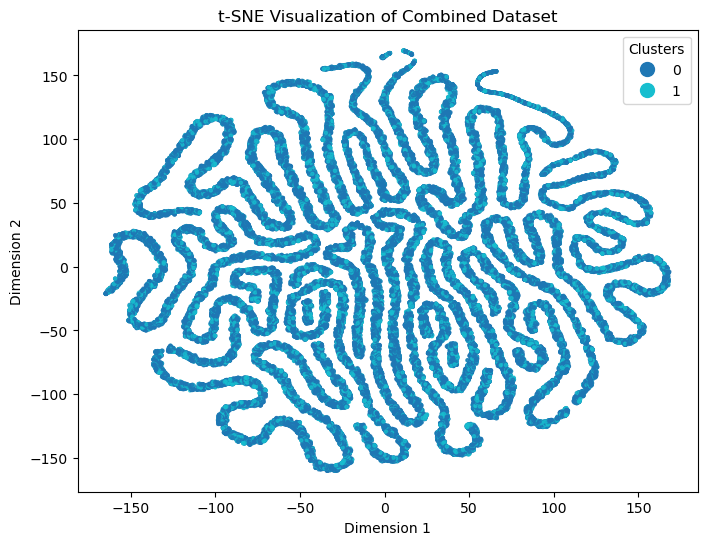

In [95]:
# Drop rows with NaN values
features = combined_dataset.dropna().drop(columns=['label']).to_numpy()
labels = combined_dataset.dropna()['label'].to_numpy()

# Now run the t-SNE
plot_tsne_opentsne(features, labels, title="t-SNE Visualization of Combined Dataset")


In [100]:
import gradio as gr
import pandas as pd
import numpy as np
from openTSNE import TSNE
import matplotlib.pyplot as plt
from matplotlib import colors
from tensorflow.keras.models import load_model

# Assuming x_unlabeled_scaled and trained_model are already available in your session
# Example: x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)

# Helper functions
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """Generate predictions for unlabeled data."""
    # Encode unlabeled data
    x_unlab_encoded = encoder.predict(x_unlab)
    # Predict with the classifier
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)
    # Convert probabilities to predicted class labels
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
    return y_unlab_pred

def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    """Generate t-SNE visualization with distinct cluster colors."""
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}
    discrete_colors = np.array([label_to_color[label] for label in labels])

    cmap = plt.cm.get_cmap('tab10', len(unique_labels))
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=discrete_colors, cmap=cmap, s=5, alpha=0.7)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10) for idx in range(len(unique_labels))]
    plt.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))
    plt.close()  # Close the figure to avoid overlapping in Gradio
    return plt

# Define Gradio function
def process_and_visualize(dataframe):
    """
    Process the input dataframe, predict labels, and visualize with t-SNE.
    """
    # Ensure the input is a DataFrame
    if not isinstance(dataframe, pd.DataFrame):
        return "Input must be a pandas DataFrame!"

    # Select 100 rows from the input DataFrame
    dataframe_subset = dataframe.iloc[:100]

    # Ensure model and encoder are preloaded
    encoder = load_model(r"C:\Users\CHINTU\Desktop\encoder_model.keras")  # Load pre-trained encoder
    predictor = trained_model  # Assume predictor is already trained

    # Convert DataFrame to NumPy array for predictions
    features = dataframe_subset.to_numpy()
    predicted_labels = generate_unlabeled_predictions(features, encoder, predictor)

    # Create t-SNE visualization
    tsne_plot = plot_tsne_opentsne(features, predicted_labels, title="t-SNE Visualization of Input Data")

    # Return the visualization and predictions
    return tsne_plot, pd.DataFrame({"Predicted Labels": predicted_labels}).head(10)

# Initialize Gradio Interface
inputs = gr.Dataframe(headers=None, label="Input Data (100 rows max)", datatype="number")
outputs = [
    gr.Plot(label="t-SNE Visualization"),
    gr.Dataframe(label="Predicted Labels (Top 10)")
]

gr.Interface(
    fn=process_and_visualize,
    inputs=inputs,
    outputs=outputs,
    title="Self-Supervised Learning Visualizer",
    description="Upload a subset of the unlabeled dataset for visualization and prediction."
).launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
